 ## VARIABLES EXPLANATIONS
- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment   delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
#default imports
import pandas as pd
import numpy as np
import os
import time
import sys
import joblib
from contextlib import contextmanager
from itertools import combinations

#plot imports
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler,MinMaxScaler

##others
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.base import clone
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate, selection_rate
#from sklearn.feature_selection import SelectKBest, f_classif,SelectFromModel

#modelling imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,roc_auc_score,precision_score,accuracy_score,recall_score,f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
import shap

import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#time script
start_script = time.time()

In [3]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [4]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [9]:
cat_cols = ['EDUCATION', 'MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
num_cols = ['AGE','LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [10]:
#removing sex from modelling features due to discriminability factors

In [11]:
#sns.pairplot(df)

In [12]:
#target variable distribution
def count_plot(dataset,ax):
    total = len(dataset)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.tight_layout()
    plt.show()

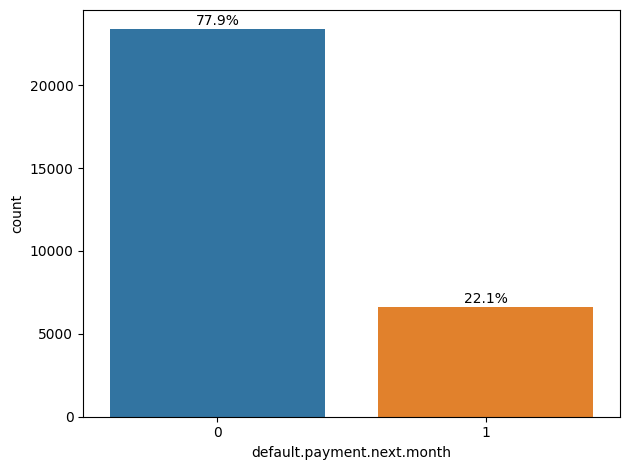

In [13]:
ax = sns.countplot(data = df,x='default.payment.next.month')
count_plot(df,ax)

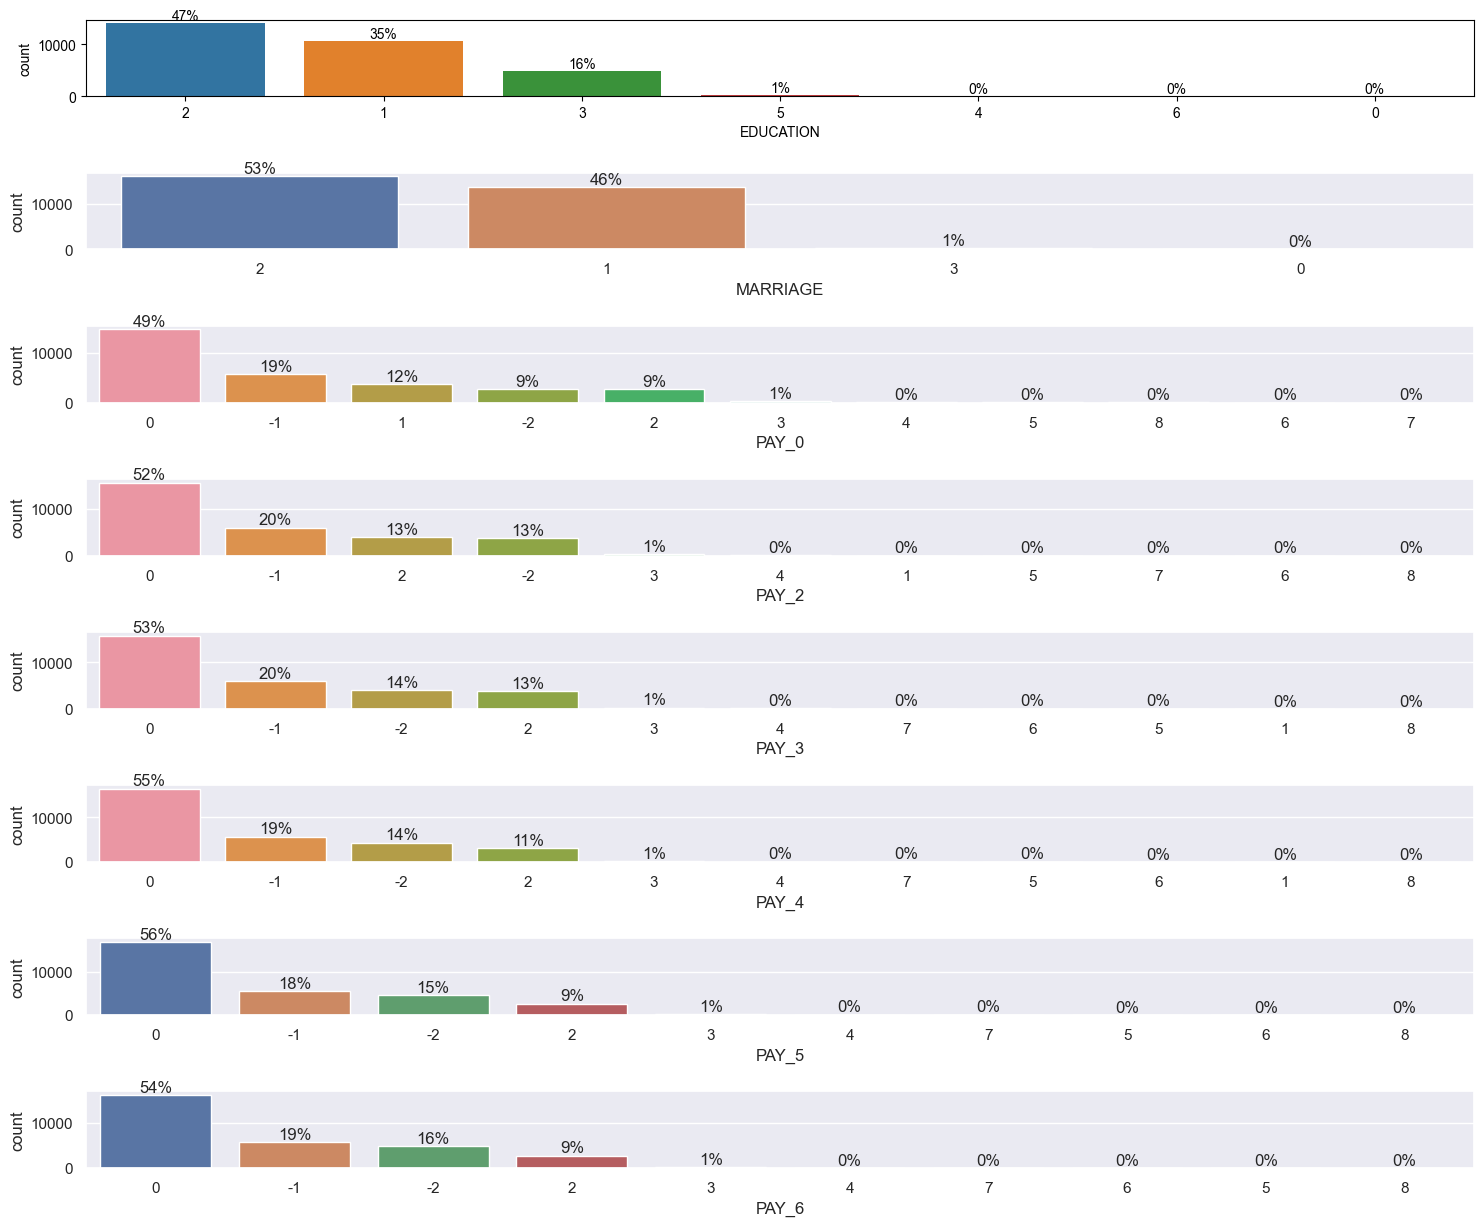

In [14]:
#plot the countplots for cat columns
fig = plt.subplots(figsize=(15,15))
for i,j in enumerate(cat_cols):
    plt.subplot(10,1,i+1)
    plt.subplots_adjust(wspace=1.0)
    ax = sns.countplot(x=j,data = df, order = df[j].value_counts(ascending=False).index)
    rel_values = df[j].value_counts(ascending=False,normalize=True).values*100
    lbls= [f'{p:.0f}%'for p in rel_values]
    ax.bar_label(ax.containers[0],labels=lbls)
    sns.set(font_scale=1)
plt.tight_layout()
    

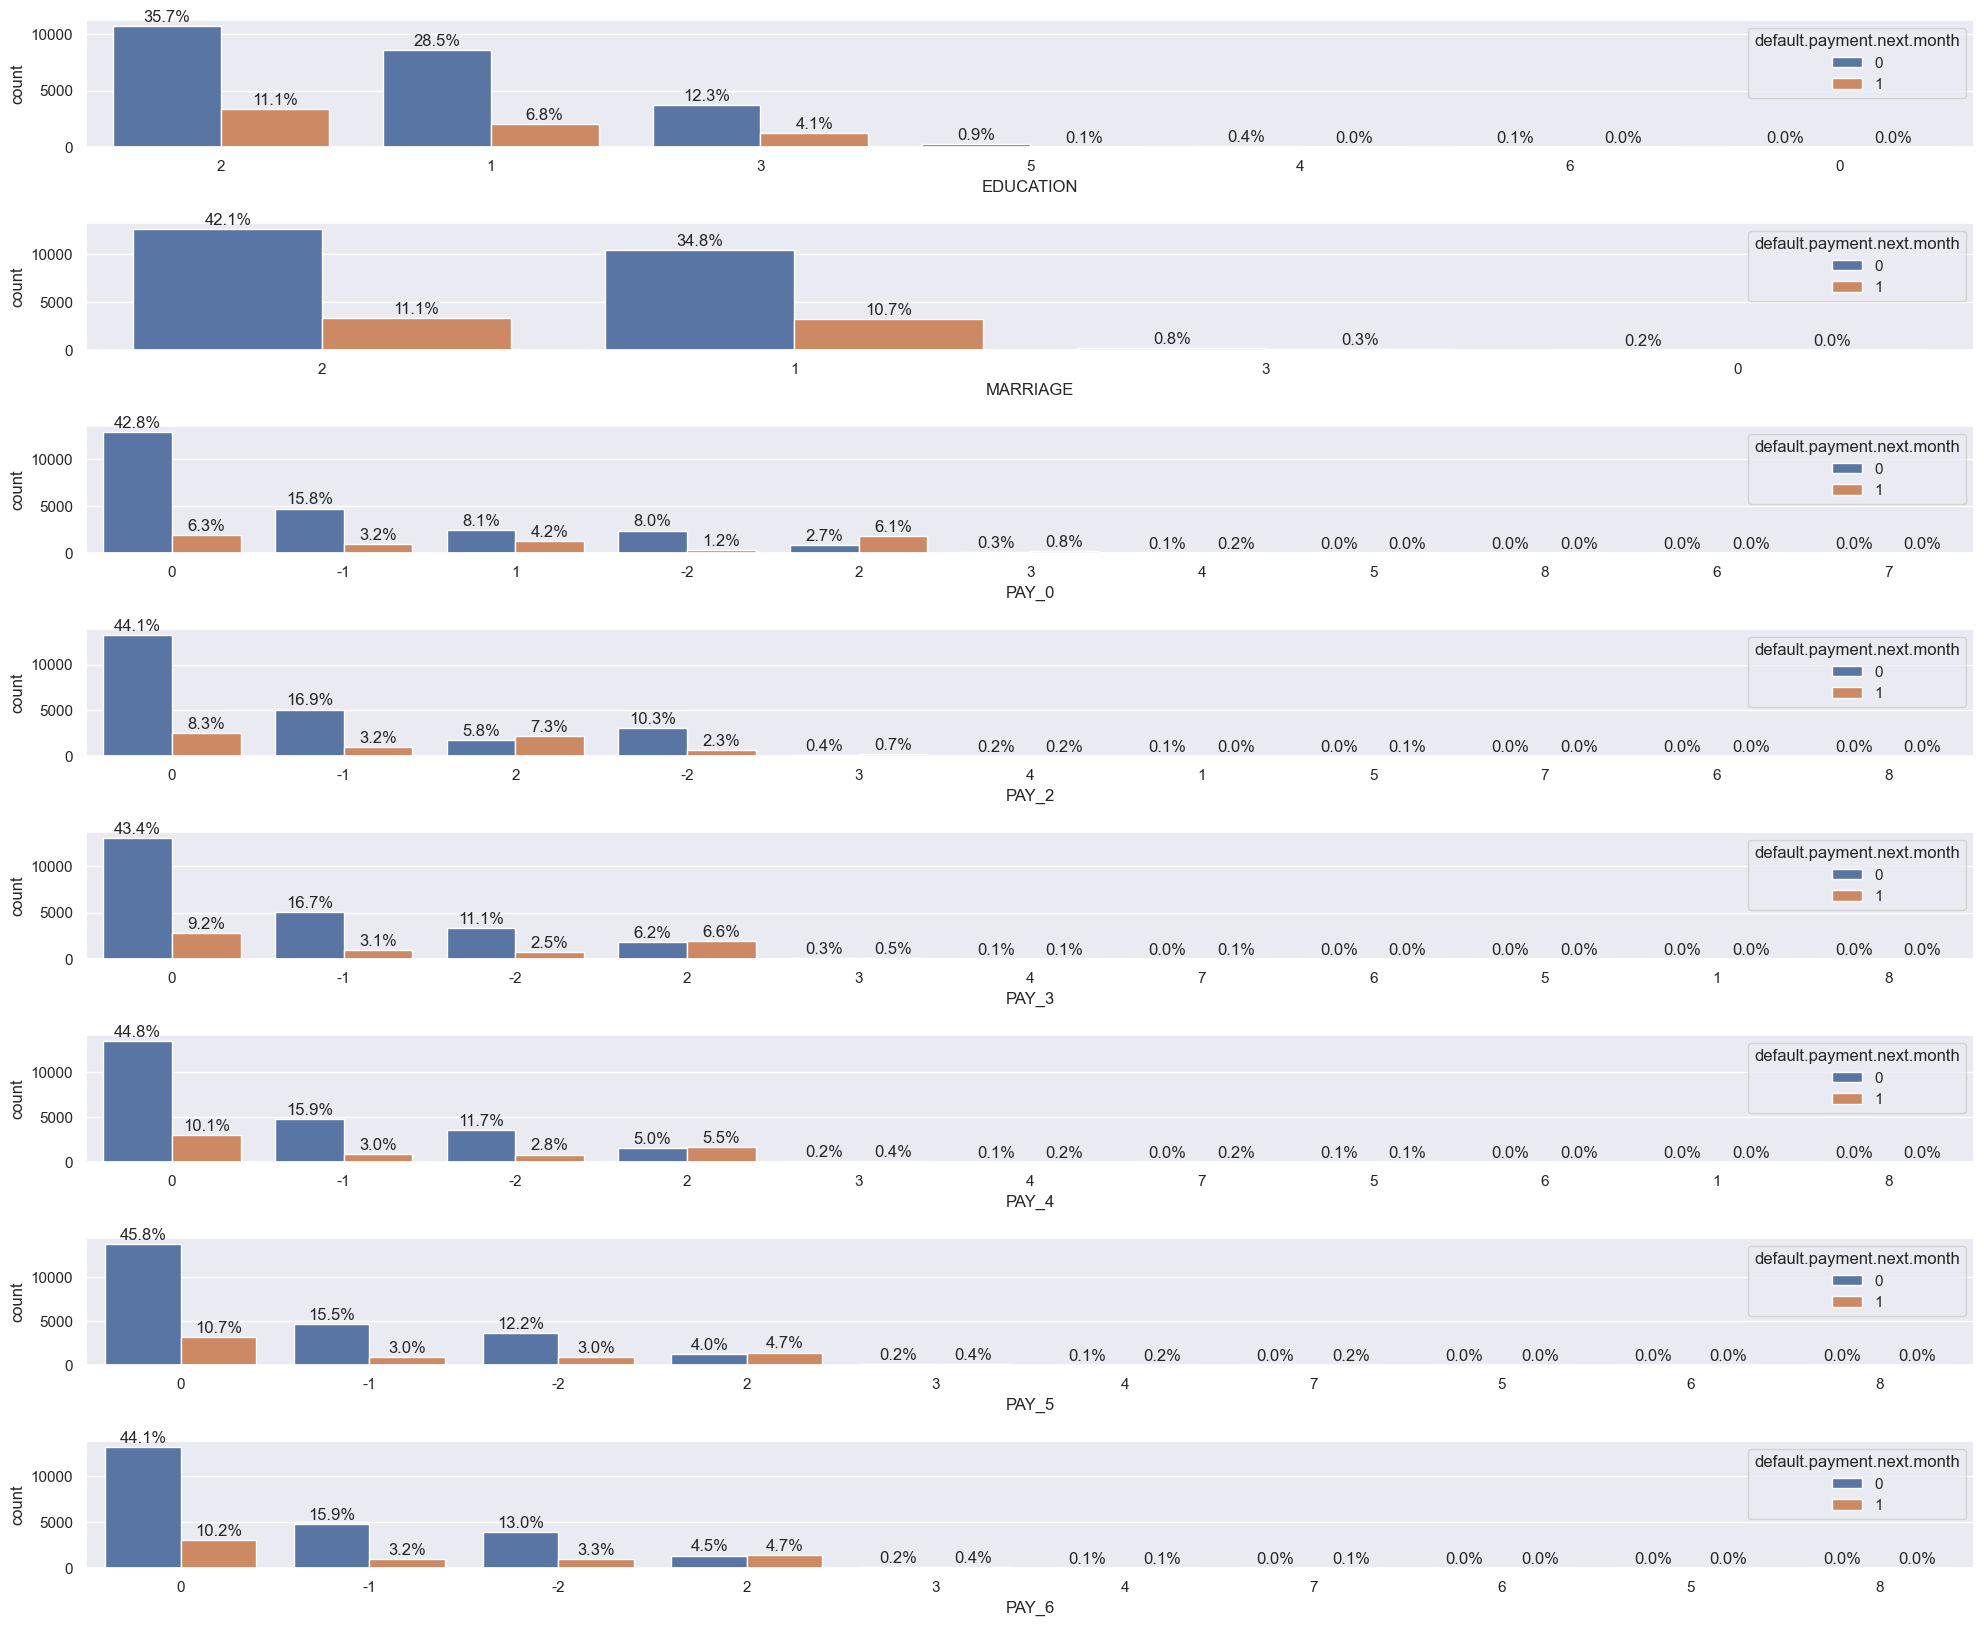

In [15]:
#plot the countplots for cat columns based on target
fig = plt.subplots(figsize=(20,20))
for i,j in enumerate(cat_cols):
    plt.subplot(10,1,i+1)
    plt.subplots_adjust(wspace=1.0)
    ax = sns.countplot(x=j,data = df,hue=df['default.payment.next.month'], order = df[j].value_counts(ascending=False).index)
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

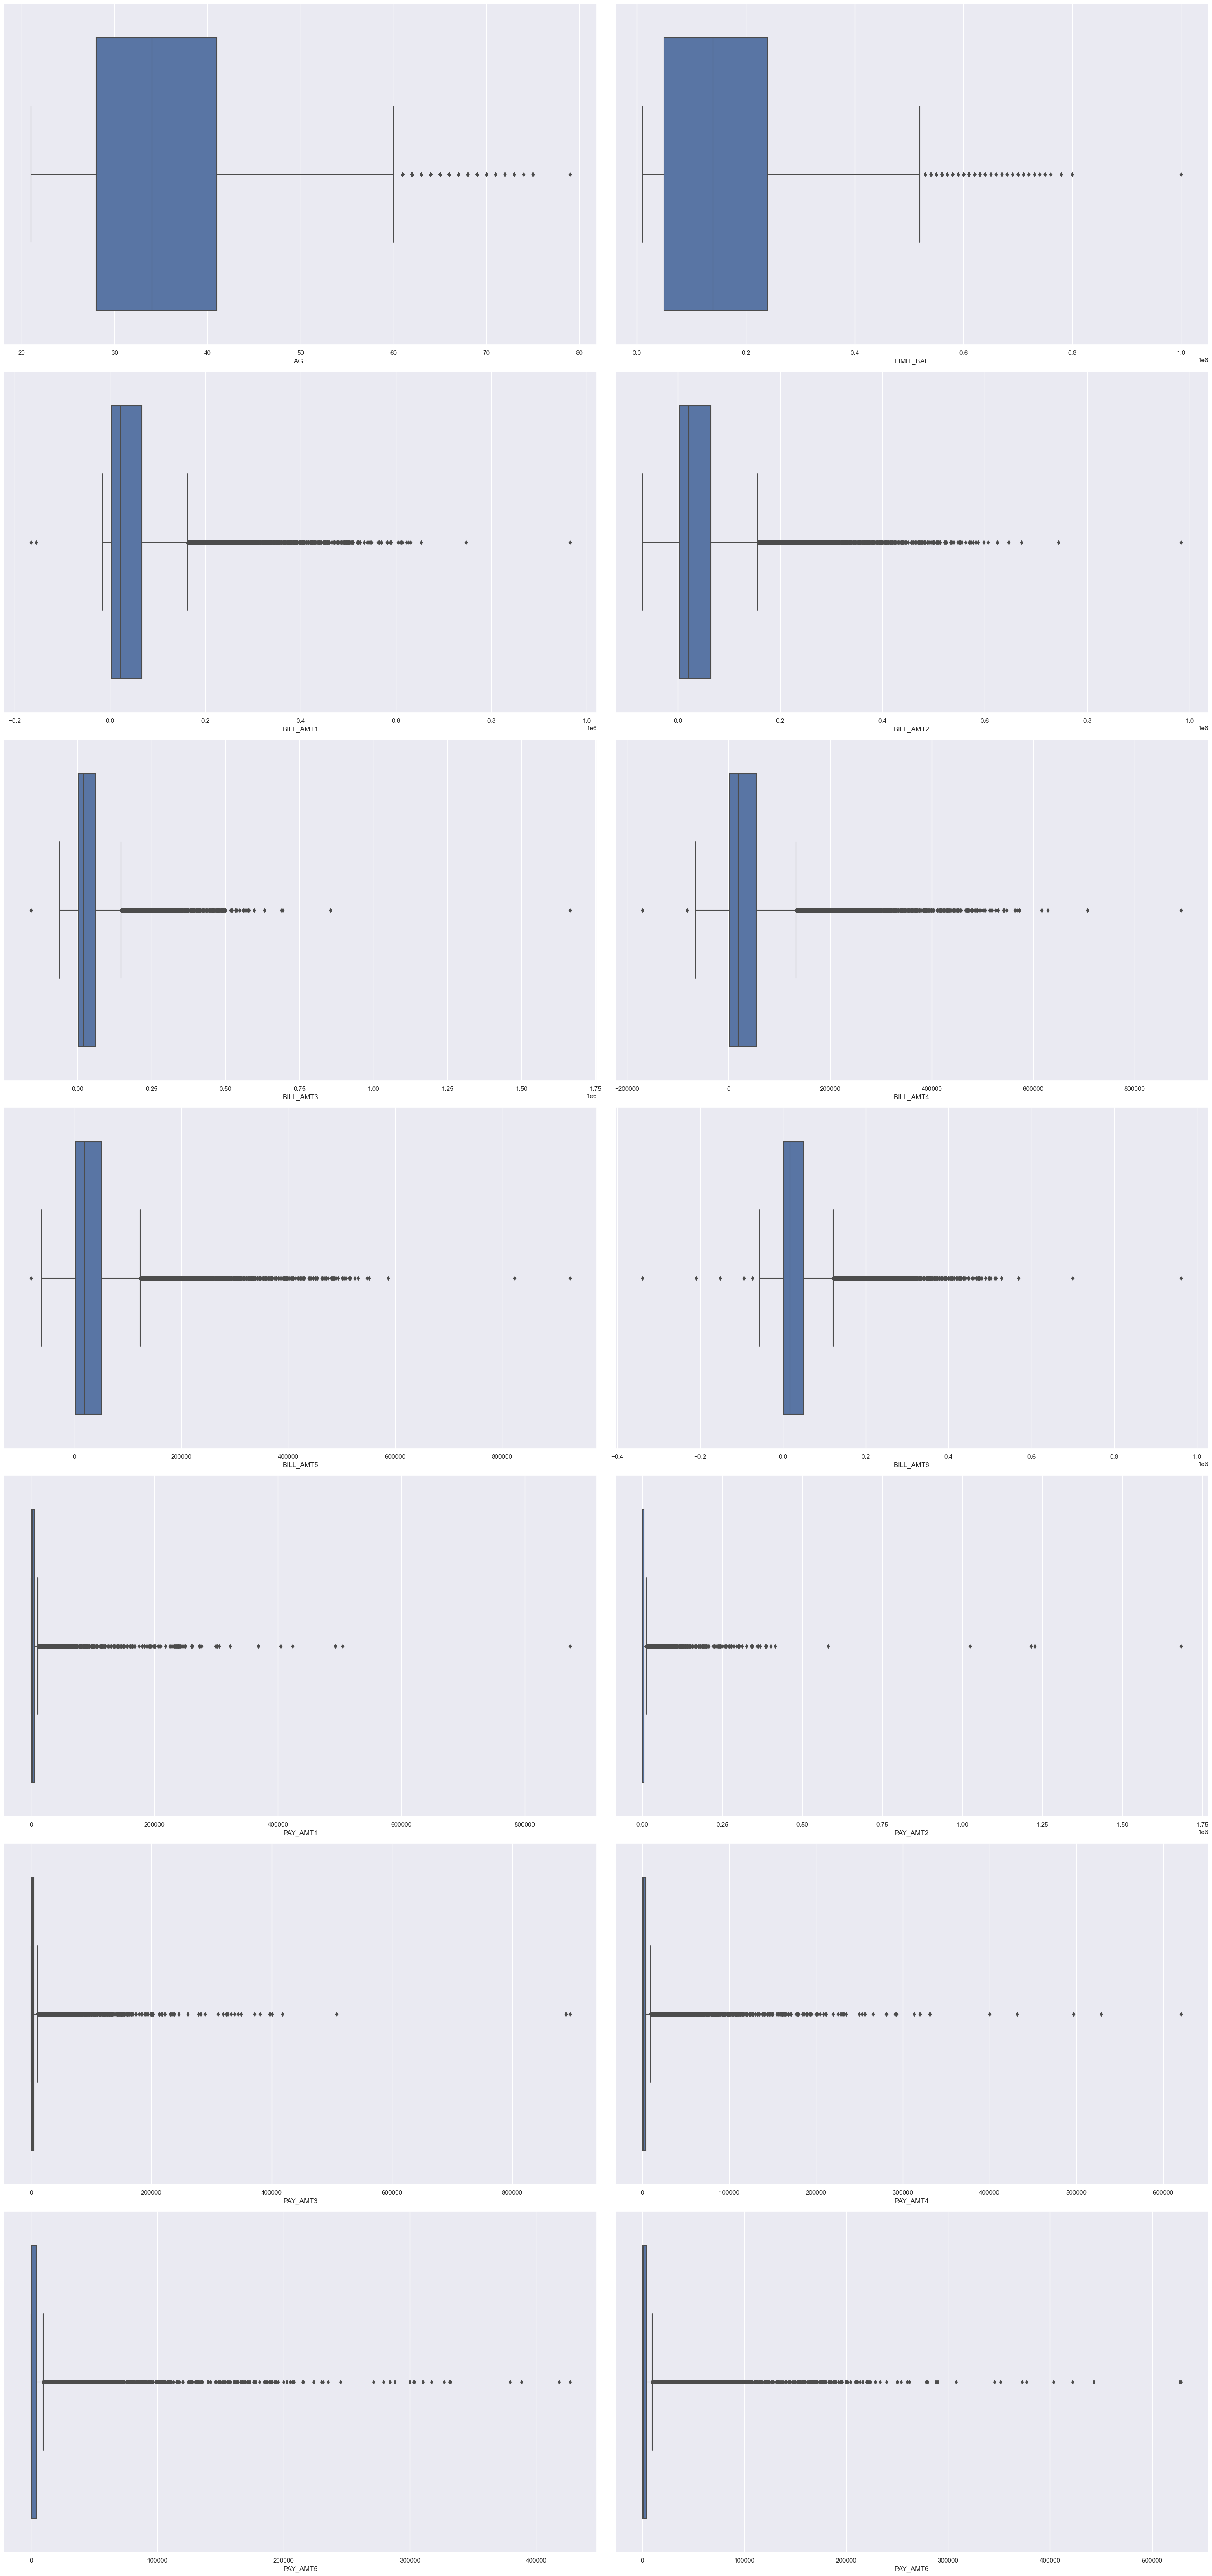

In [16]:
#plot the boxplots for numerical columns
fig = plt.subplots(figsize=(30,90))
for i,j in enumerate(num_cols):
    plt.subplot(10,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    ax = sns.boxplot(x=j,data = df)
    sns.set(font_scale=1.0)
plt.tight_layout()

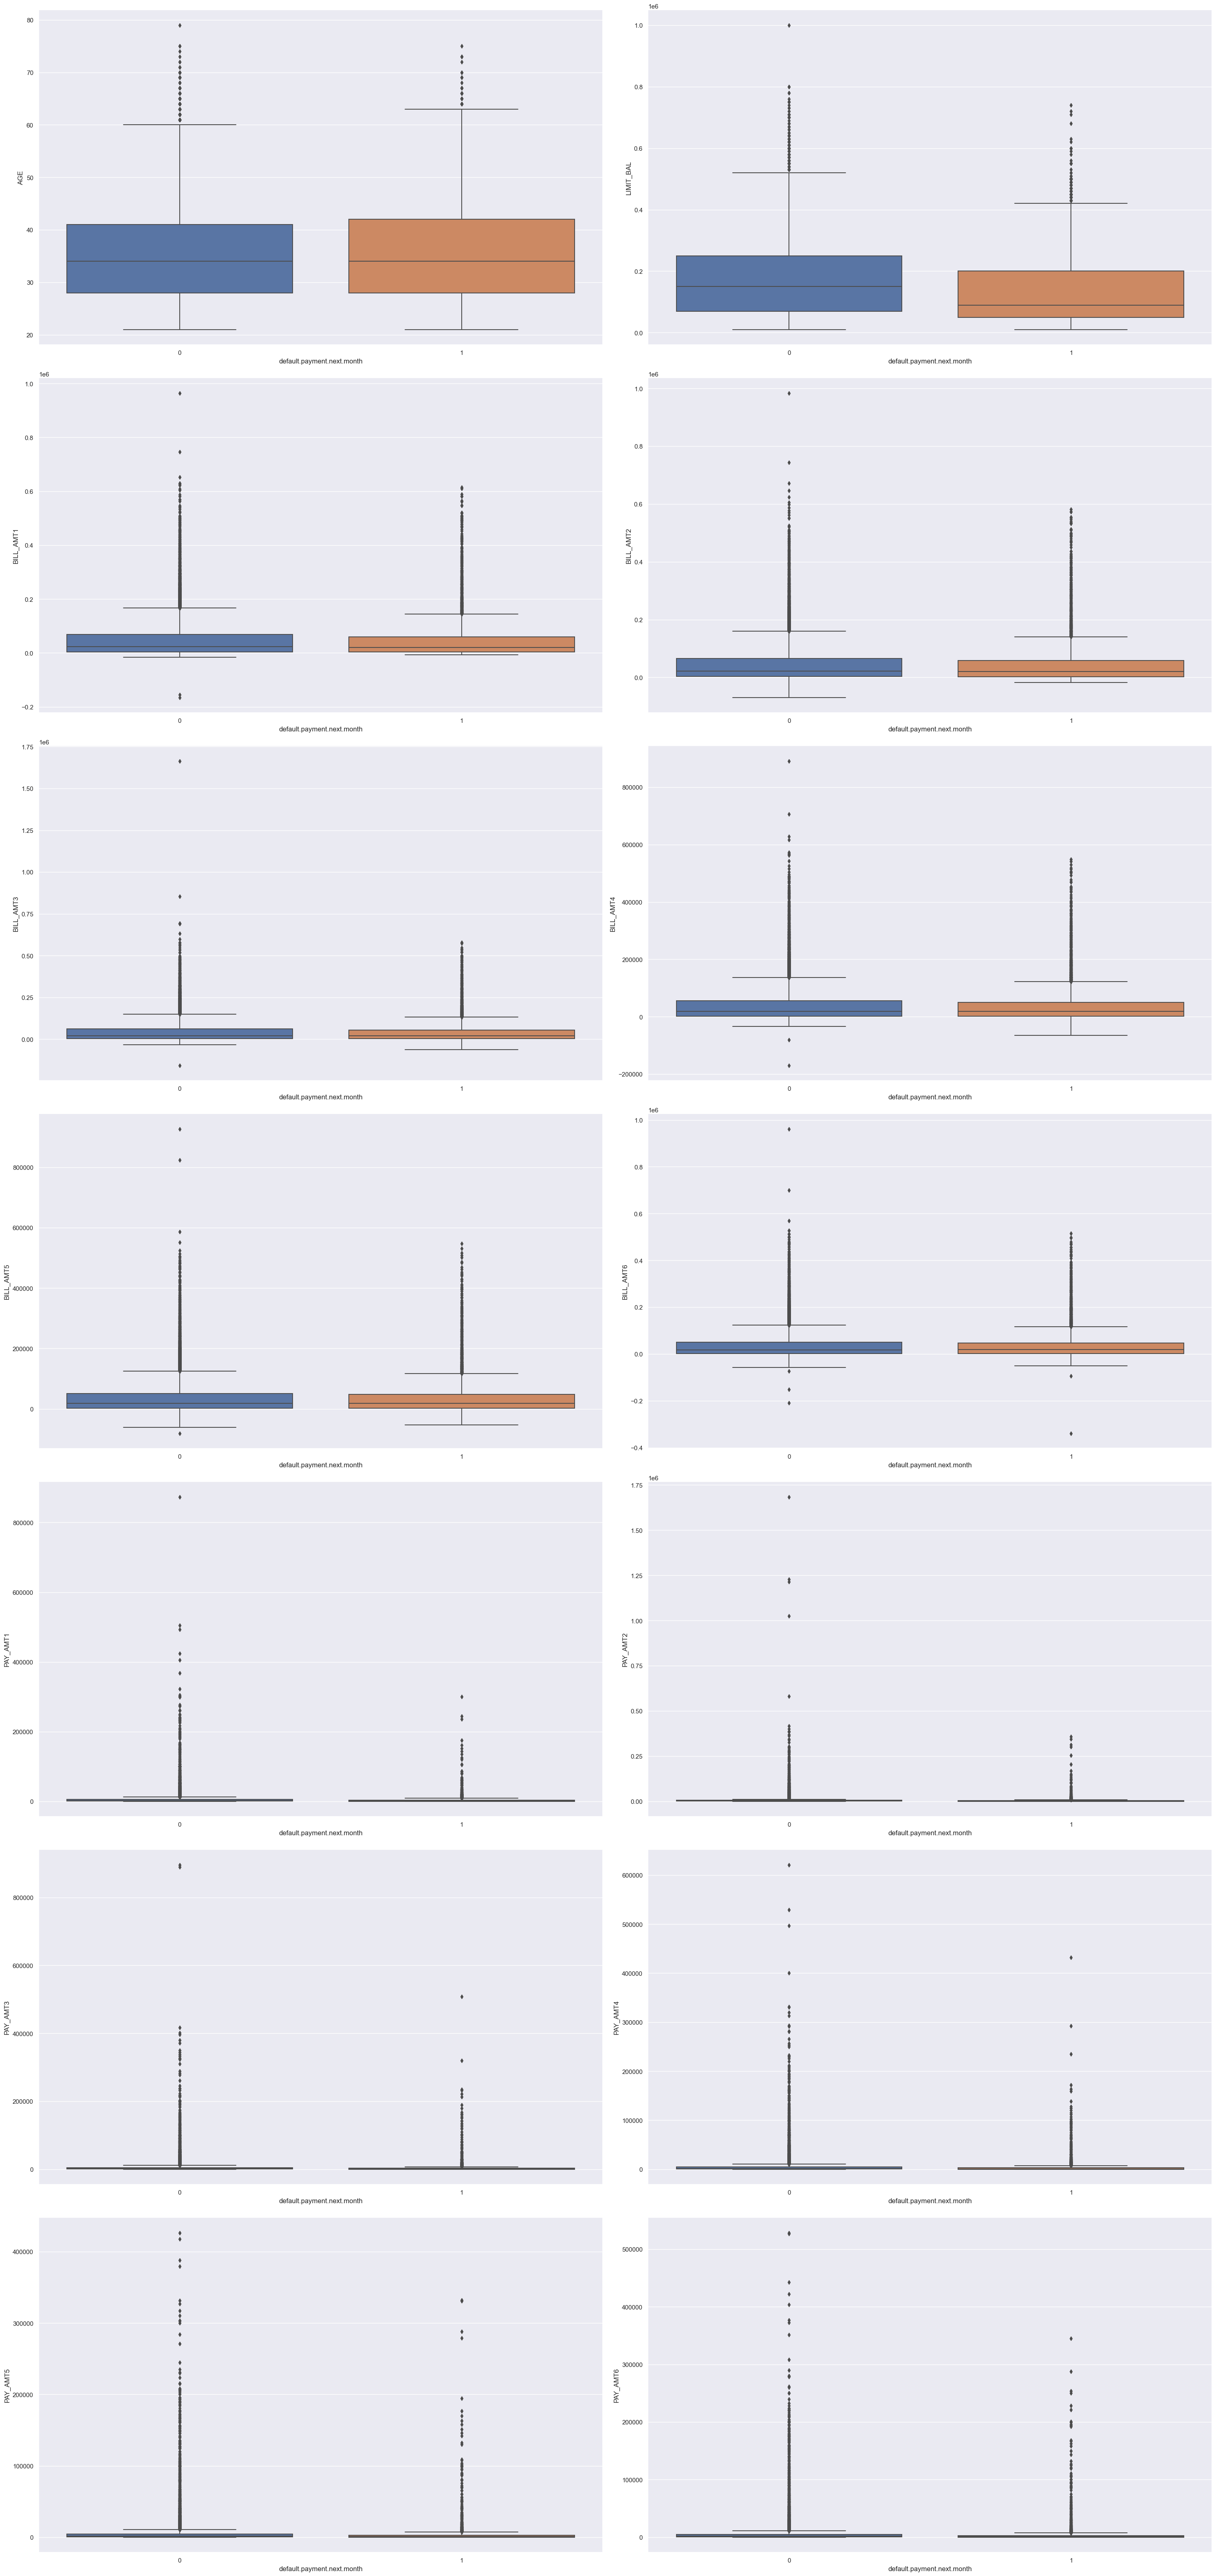

In [17]:
#visualize numerical columns aginst target
fig = plt.subplots(figsize=(30,90))
for i,j in enumerate(num_cols):
    plt.subplot(10,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    sns.boxplot(x=df['default.payment.next.month'],y=j,data=df)
    sns.set(font_scale=1.0)
plt.tight_layout()

In [18]:
bins = [-np.inf,18,25,35,45,99,np.inf]
labels = ['<18','18-25','26-35','36-45','46+','>99']
df['AGE_BINS'] = pd.cut(df['AGE'],bins=bins,labels=labels)
df['AGE_BINS'] = df['AGE_BINS'].replace(['<18','>99'],'Invalid')
df['AGE_BINS'] = df['AGE_BINS'].replace(np.nan,'Invalid')
df['AGE_BINS'].value_counts()

AGE_BINS
26-35      12938
36-45       8522
46+         4669
18-25       3871
Invalid        0
Name: count, dtype: int64

<Axes: xlabel='AGE_BINS', ylabel='count'>

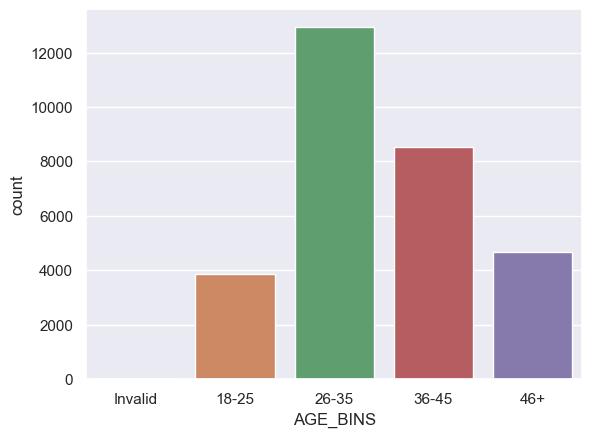

In [19]:
sns.countplot(data = df,x='AGE_BINS')

**CORRELATIONS CHECK**

<Axes: >

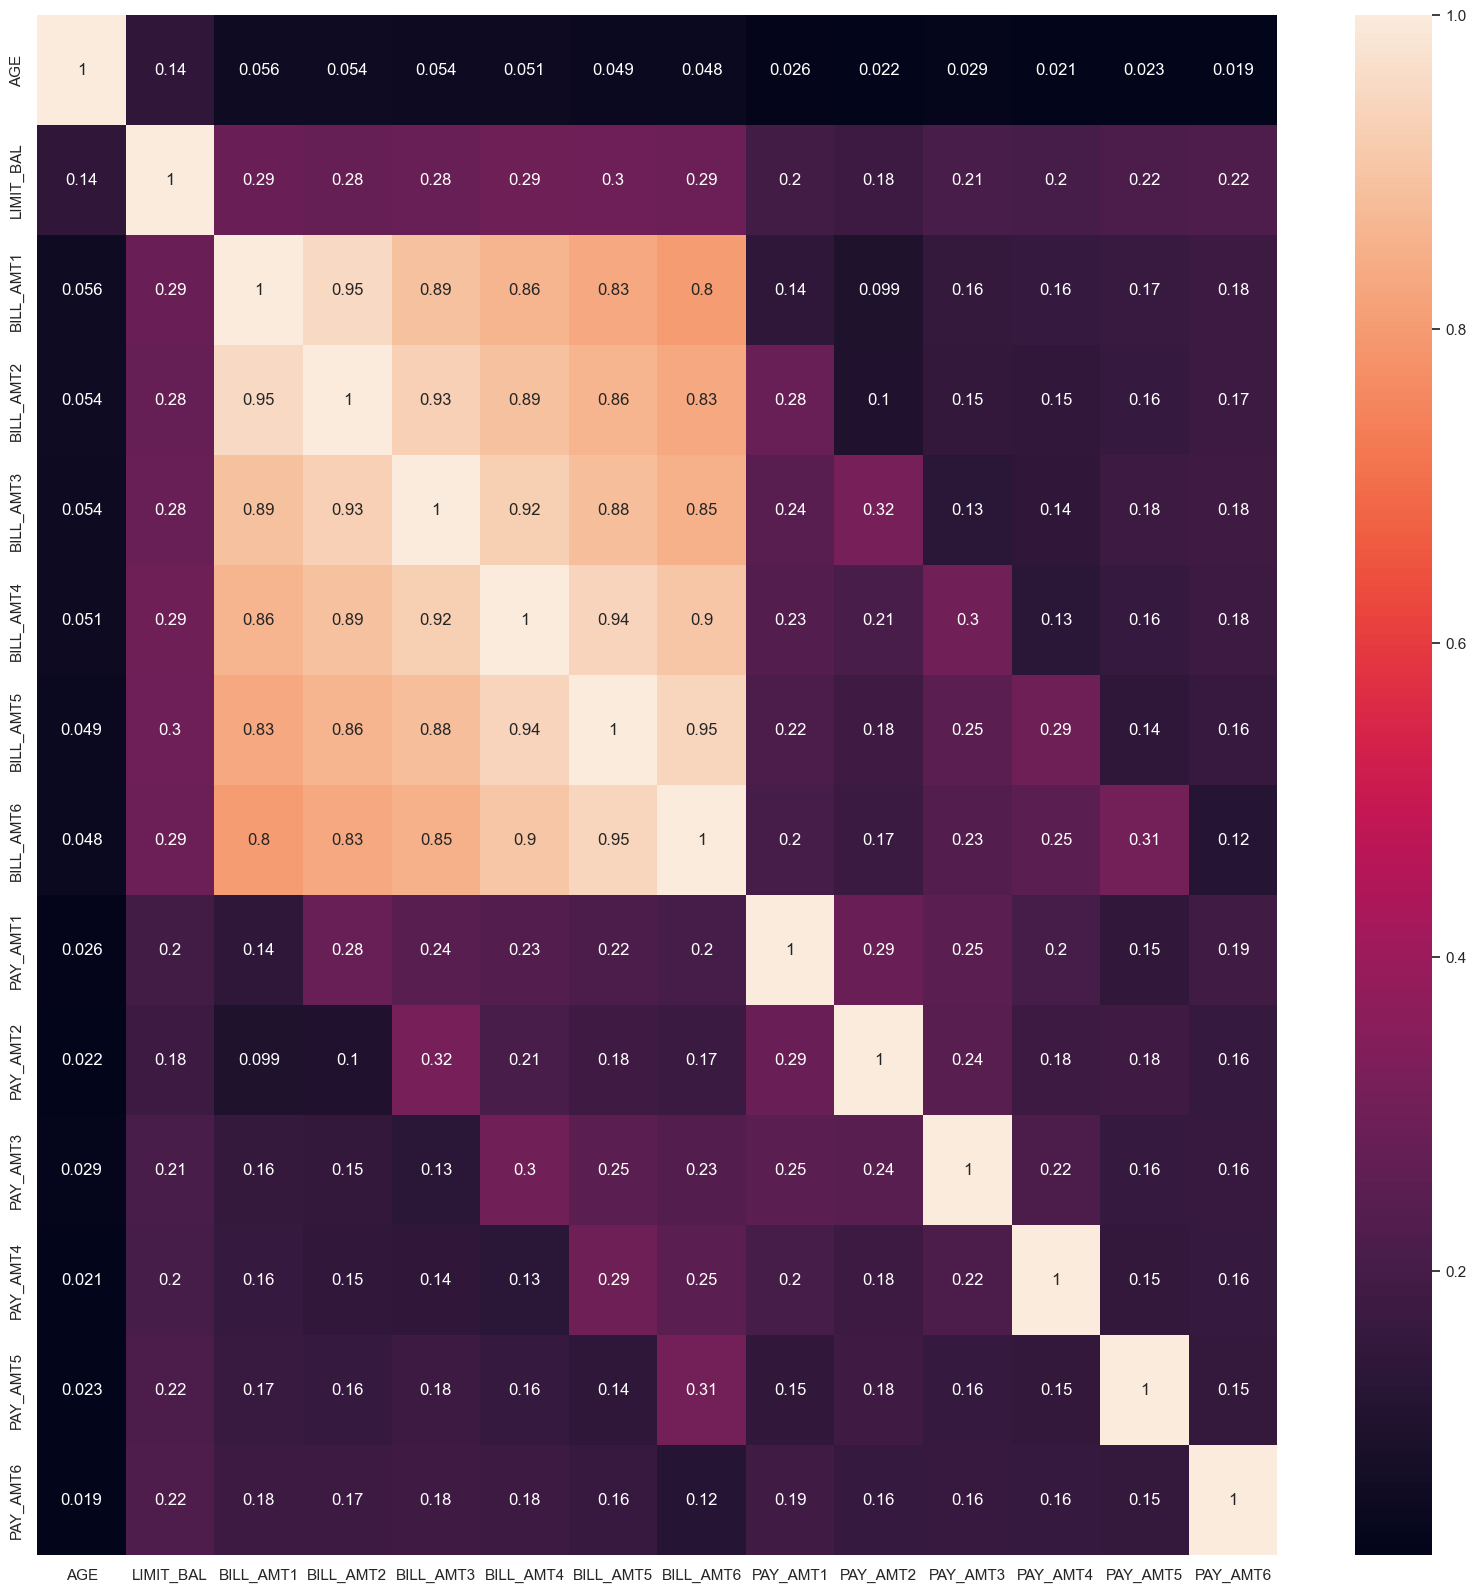

In [20]:
#Using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df[num_cols].corr(),annot=True)

In [21]:
#vif for numerical columns
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [22]:
calc_vif(df[num_cols])

,variables,vif
0,AGE,2.741991
1,LIMIT_BAL,3.214685
2,BILL_AMT1,20.646093
3,BILL_AMT2,38.058414
4,BILL_AMT3,31.712525
5,BILL_AMT4,29.402979
6,BILL_AMT5,35.826768
7,BILL_AMT6,21.286025
8,PAY_AMT1,1.888997
9,PAY_AMT2,2.369543


## Pre-Processing

- Handle outliers
- handle missing values ifany
- encode categorical data
- reduce categories ifnot enough data

In [23]:
df1 = df.copy()

**CATEGORICAL DATA**

In [24]:
for col in cat_cols:
    df1[col] = df1[col].astype('category')

In [25]:
#1. COMBINE GROUP 4,5,6 for education as they all represent others
df1['EDUCATION'].unique()

[2, 1, 3, 5, 4, 6, 0]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [26]:
#1. COMBINE GROUP 0,4,5,6 for education as they all represent others
df1['EDUCATION'] = np.where(df1['EDUCATION'].isin([0,4,5,6]),4,df['EDUCATION'])

In [27]:
#2. COMBINE GROUP 0,3 for marriage as they all represent others
df1['MARRIAGE'] = np.where(df1['MARRIAGE'].isin([0,3]),3,df['MARRIAGE'])

In [28]:
#2. COMBINE GROUP 0,3 for marriage as they all represent others
df1['MARRIAGE'] = np.where(df1['MARRIAGE'].isin([0,3]),3,df['MARRIAGE'])

In [29]:
#encode categorical columns
for i in cat_cols:
    print(i,':',df1[i].nunique())

EDUCATION : 4
MARRIAGE : 3
PAY_0 : 11
PAY_2 : 11
PAY_3 : 11
PAY_4 : 11
PAY_5 : 10
PAY_6 : 10


In [30]:
#ENCODE CATEGORICAL COLUMNS

# we are going to one  hot encode
df1 = pd.get_dummies(df1, columns=['MARRIAGE','EDUCATION','AGE_BINS'], drop_first=False)

# # Convert all the columns with prefix  0/1 instead of False/True
dumm_cols = [col for col in df1.columns if col.startswith(('MARRIAGE','EDUCATION','AGE_BINS'))]
df1[dumm_cols] = df1[dumm_cols].astype(int)

# #label encode all others
le = LabelEncoder()
for col in [col for col in cat_cols if col not in ['MARRIAGE','EDUCATION','AGE_BINS']]:
    df1[col] = le.fit_transform(df1[col])

In [31]:
df1.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,AGE_BINS_Invalid,AGE_BINS_18-25,AGE_BINS_26-35,AGE_BINS_36-45,AGE_BINS_46+
0,1,20000.0,2,24,4,4,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2,120000.0,2,26,1,4,2,2,2,3,...,0,0,1,0,0,0,0,1,0,0
2,3,90000.0,2,34,2,2,2,2,2,2,...,0,0,1,0,0,0,0,1,0,0
3,4,50000.0,2,37,2,2,2,2,2,2,...,0,0,1,0,0,0,0,0,1,0
4,5,50000.0,1,57,1,2,1,2,2,2,...,0,0,1,0,0,0,0,0,0,1


In [32]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'AGE_BINS_Invalid', 'AGE_BINS_18-25',
       'AGE_BINS_26-35', 'AGE_BINS_36-45', 'AGE_BINS_46+'],
      dtype='object')

**NUMERICAL VALUES**

In [33]:
'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'

('BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6')

In [34]:
#bill_amounts have high correlation, case use increase or decrease to model instead of the amount as is
df1['BILL_AMT2_INC'] = df1['BILL_AMT2'] - df['BILL_AMT1']
df1['BILL_AMT3_INC'] = df1['BILL_AMT3'] - df['BILL_AMT2']
df1['BILL_AMT4_INC'] = df1['BILL_AMT4'] - df['BILL_AMT3']
df1['BILL_AMT5_INC'] = df1['BILL_AMT5'] - df['BILL_AMT4']
df1['BILL_AMT6_INC'] = df1['BILL_AMT6'] - df['BILL_AMT5']

In [35]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'AGE_BINS_Invalid', 'AGE_BINS_18-25',
       'AGE_BINS_26-35', 'AGE_BINS_36-45', 'AGE_BINS_46+', 'BILL_AMT2_INC',
       'BILL_AMT3_INC', 'BILL_AMT4_INC', 'BILL_AMT5_INC', 'BILL_AMT6_INC'],
      dtype='object')

In [36]:
new_num_cols = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2_INC', 'BILL_AMT3_INC',
       'BILL_AMT4_INC', 'BILL_AMT5_INC', 'BILL_AMT6_INC', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [37]:
calc_vif(df1[new_num_cols])

,variables,vif
0,LIMIT_BAL,1.872036
1,BILL_AMT1,2.767297
2,BILL_AMT2_INC,1.507905
3,BILL_AMT3_INC,2.000700
4,BILL_AMT4_INC,1.930461
5,BILL_AMT5_INC,1.685657
6,BILL_AMT6_INC,1.654723
7,PAY_AMT1,1.888071
8,PAY_AMT2,2.369377
9,PAY_AMT3,1.887747


In [38]:
percentile25 = df1['LIMIT_BAL'].quantile(0.25)
percentile75 = df1['LIMIT_BAL'].quantile(0.75)
iqr = percentile75-percentile25

In [39]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile75 - 1.5*iqr
print("upper limit : ",upper_limit)
print("lower limit :", lower_limit)

upper limit :  525000.0
lower limit : -45000.0


In [40]:
for col in num_cols:
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile75 - 1.5*iqr
    #trimming
    df1 = df1.loc[(df1[col]<=upper_limit) & (df1[col]>=lower_limit)]

In [41]:
print("final data shape",df1.shape)

final data shape (29456, 40)


In [42]:
len(new_num_cols)

13

In [43]:
df1[new_num_cols].describe()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2_INC,BILL_AMT3_INC,BILL_AMT4_INC,BILL_AMT5_INC,BILL_AMT6_INC,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29456.000000,29456.000000,29456.000000,29456.000000,29456.000000,29456.000000,29456.000000,29456.000000,29456.000000,29456.000000,29456.000000,29456.000000,29456.000000
mean,161825.084193,46740.783847,-1825.960416,-2141.615596,-3346.740189,-2589.116920,-1268.269453,5292.644011,5288.252037,4788.279570,4469.353069,4420.991581,4756.124932
std,122846.684315,61607.670158,19713.550517,20404.184362,20598.092753,18500.291179,16642.257660,13767.602675,14301.863560,13432.410494,13037.059517,12811.620902,14899.702383
min,10000.000000,-154973.000000,-319082.000000,-337907.000000,-298846.000000,-320514.000000,-296507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,3409.750000,-2166.250000,-2500.000000,-3272.000000,-2515.500000,-1564.000000,950.750000,782.750000,390.000000,266.750000,207.000000,76.750000
50%,140000.000000,21474.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2071.500000,2000.000000,1751.000000,1500.000000,1500.000000,1486.000000
75%,230000.000000,63709.500000,1496.000000,1385.250000,1030.250000,997.000000,1156.000000,5000.000000,5000.000000,4246.000000,4000.000000,4000.000000,4000.000000
max,520000.000000,351232.000000,256806.000000,300165.000000,324873.000000,281225.000000,283743.000000,276698.000000,279048.000000,288921.000000,281225.000000,284069.000000,280000.000000


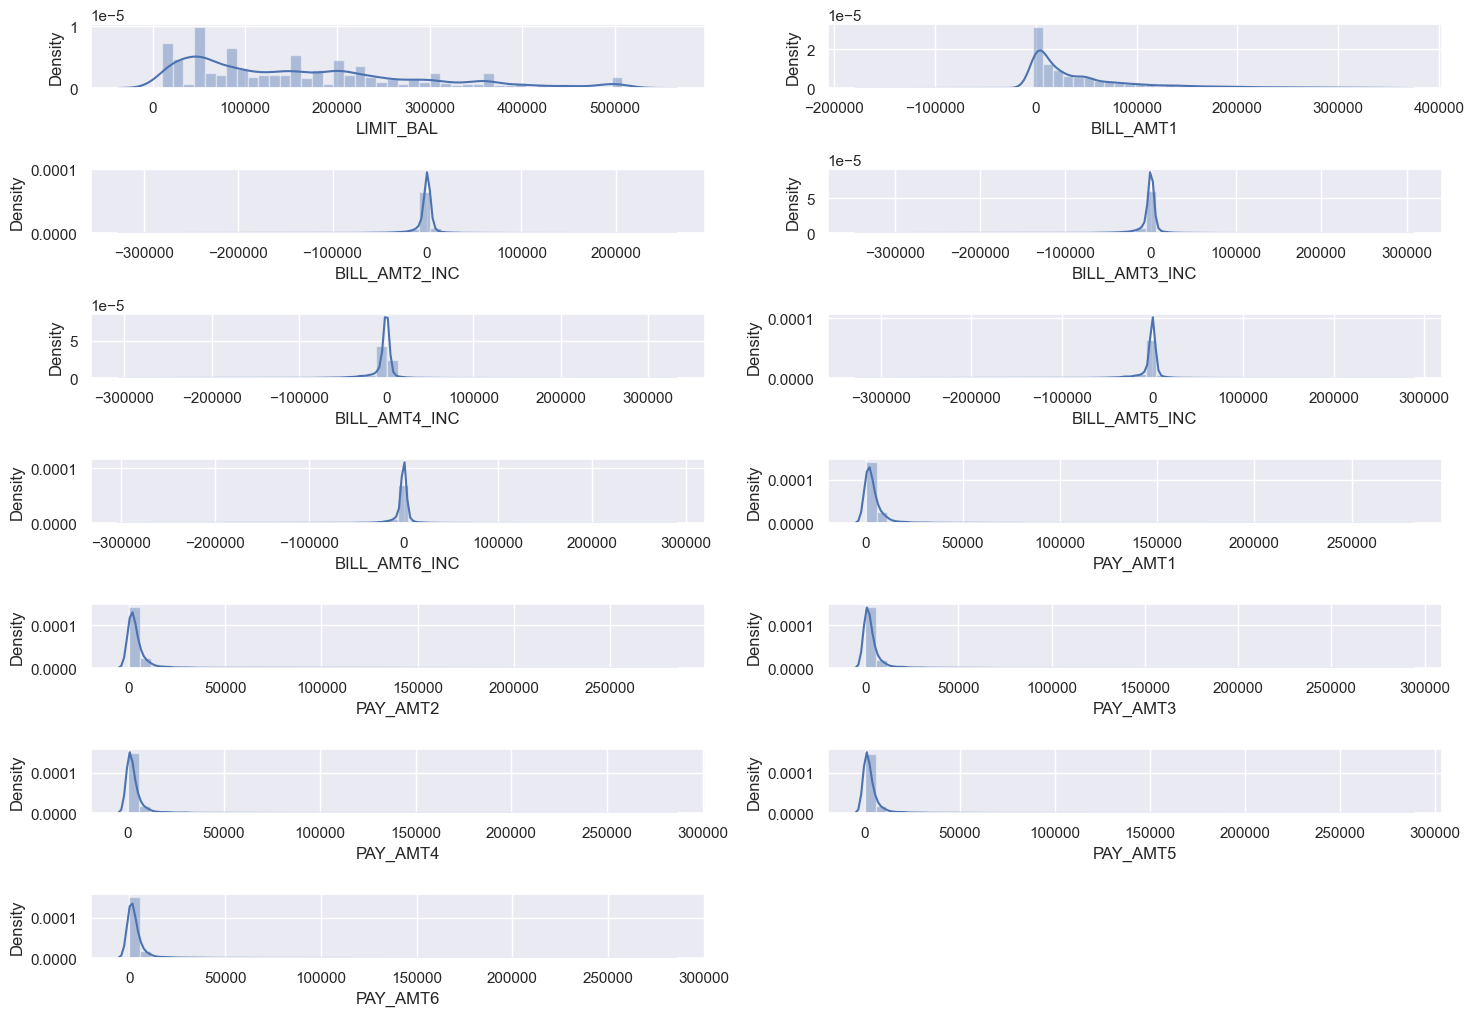

In [44]:
plt.figure(figsize=(15,20))
plt.title("ORIGINAL DISTRIBUTIONS")
for i,j in enumerate(new_num_cols):
    plt.subplot(14,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    ax = sns.distplot(df1[j])
    sns.set(font_scale=1)
plt.tight_layout()

In [45]:
#for handling cols with negative values
for col in new_num_cols:
    df1[col] = np.log1p(df1[col] - df1[col].min() + 1)

In [46]:
df1[new_num_cols] = df1[new_num_cols].apply(lambda x: np.log1p(x))

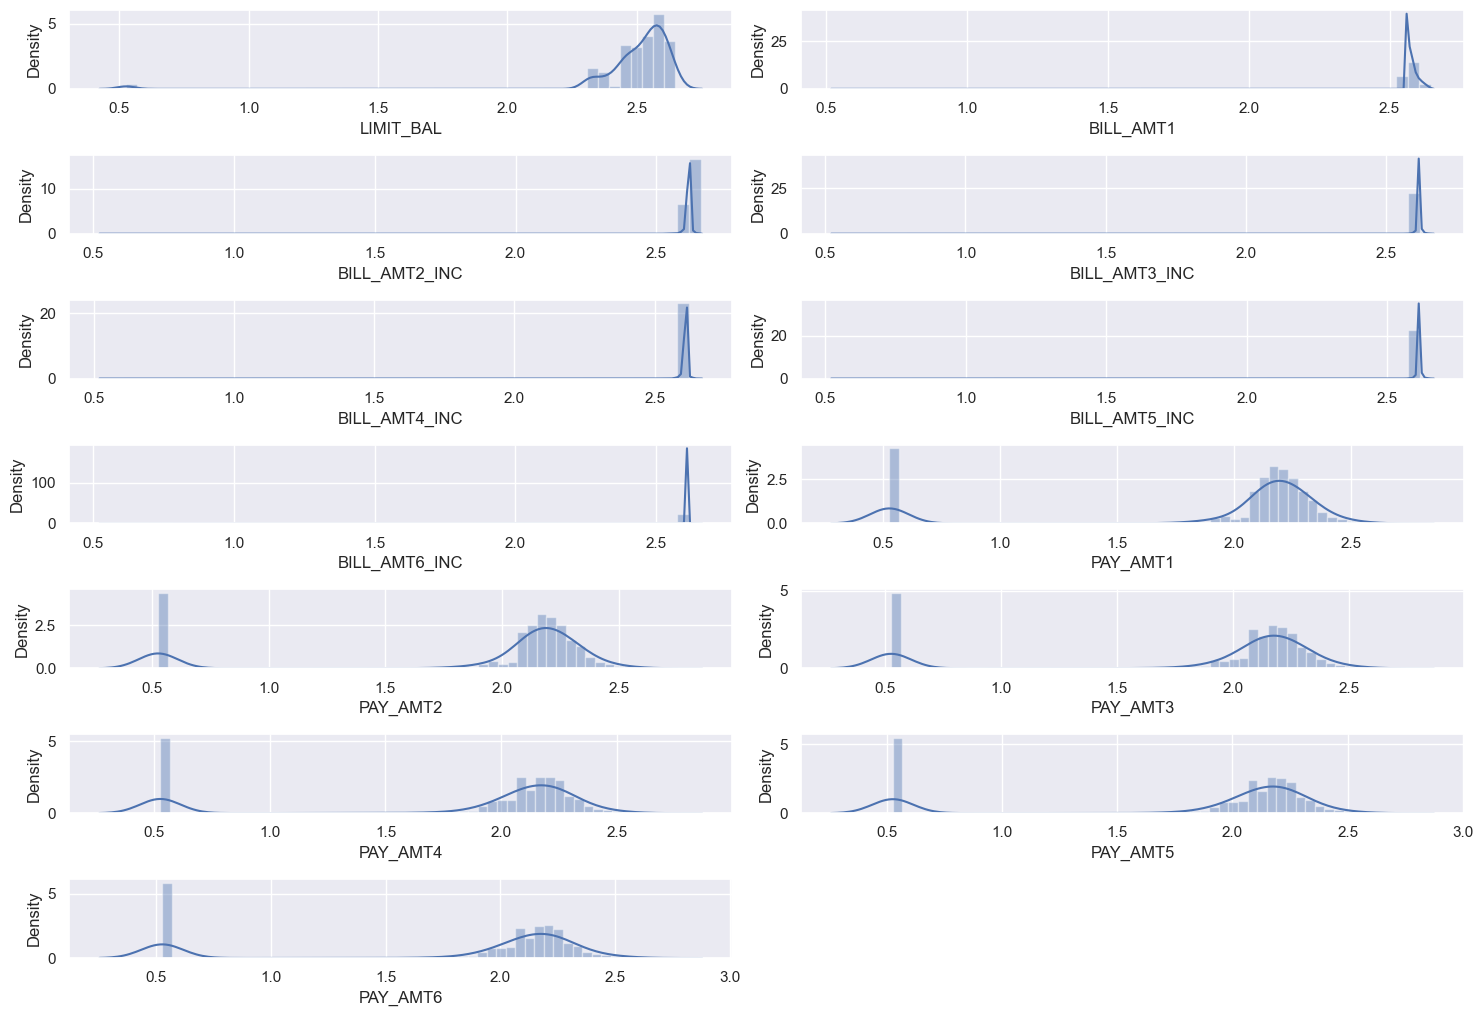

In [47]:
plt.figure(figsize=(15,20))
plt.title("LOGGED DISTRIBUTIONS")
for i,j in enumerate(new_num_cols):
    plt.subplot(14,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    ax = sns.distplot(df1[j])
    sns.set(font_scale=1)
plt.tight_layout()

## TRAIN TEST SPLIT AND SCALING

In [48]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'AGE_BINS_Invalid', 'AGE_BINS_18-25',
       'AGE_BINS_26-35', 'AGE_BINS_36-45', 'AGE_BINS_46+', 'BILL_AMT2_INC',
       'BILL_AMT3_INC', 'BILL_AMT4_INC', 'BILL_AMT5_INC', 'BILL_AMT6_INC'],
      dtype='object')

In [49]:
cat_cols = ['MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'AGE_BINS_18-25','AGE_BINS_26-35', 'AGE_BINS_36-45', 'AGE_BINS_46+']

In [50]:
print(new_num_cols)

['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2_INC', 'BILL_AMT3_INC', 'BILL_AMT4_INC', 'BILL_AMT5_INC', 'BILL_AMT6_INC', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [52]:
input_features = cat_cols + new_num_cols
x = df1[input_features]
y = df1['default.payment.next.month']

In [53]:
print(input_features)

['MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'AGE_BINS_18-25', 'AGE_BINS_26-35', 'AGE_BINS_36-45', 'AGE_BINS_46+', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2_INC', 'BILL_AMT3_INC', 'BILL_AMT4_INC', 'BILL_AMT5_INC', 'BILL_AMT6_INC', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [55]:
ids = df1[['ID']]
ids = ids.drop_duplicates()

x_train_ids = ids.sample(frac=0.80, random_state=200)
x_test_ids = ids.loc[~ids['ID'].isin(
    x_train_ids.ID)]

train_data = df1[df1['ID'].isin(
    x_train_ids.ID)]
train_data = train_data.reset_index(drop=True)
print(train_data.groupby(['default.payment.next.month'])['ID'].count())

default.payment.next.month
0    18339
1     5226
Name: ID, dtype: int64


In [56]:
test_data = df1[df1['ID'].isin(
                x_test_ids.ID)]
test_data = test_data.reset_index(drop=True)
print('TEST DATA:', test_data.shape)
print(test_data.groupby(['default.payment.next.month'])['ID'].count())

TEST DATA: (5891, 40)
default.payment.next.month
0    4586
1    1305
Name: ID, dtype: int64


In [58]:
x_train = train_data.drop(['ID', 'default.payment.next.month'], axis=1)

x_train = x_train[input_features]
y_train = train_data[['default.payment.next.month']]

In [59]:
x_test = test_data.drop(['ID', 'default.payment.next.month'], axis=1)

x_test = x_test[input_features]
y_test = test_data[['default.payment.next.month']]

**RESAMPLE DATA**

In [60]:
under = RandomUnderSampler(sampling_strategy=0.4285, random_state=200)
x_train,y_train = under.fit_resample(x_train,y_train)

In [61]:
#CREATE PATH FOR SAVING FILES
model_results = "my_projects/credit_card_default" #change to own file path
cur_user = "UNDER_LASSO" + os.getlogin().split('.')[0]
exp_code = str(round(time.time() * 1000)) + cur_user
results_path = os.path.join(model_results, exp_code)+"/"

try:
    os.mkdir(results_path)
except OSError as error:
    pass

In [63]:
# save scale
scaler_file = "CC_MODEL_SCALER.pkl"
joblib.dump(under,results_path + scaler_file)

['C:/Users/user/Desktop/analytics/my_projects/credit_card_default\\1744782419750UNDER_LASSOuser/CC_MODEL_SCALER.pkl']

In [64]:
x_train.shape

(17422, 30)

In [113]:
x_train.to_csv("x_train.csv",index=False)
x_test.to_csv("x_test.csv",index=False)
y_train.to_csv("y_train.csv",index=False)
y_test.to_csv("y_test.csv",index=False)

In [66]:
x_test.head()

,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,PAY_0,PAY_2,PAY_3,...,BILL_AMT3_INC,BILL_AMT4_INC,BILL_AMT5_INC,BILL_AMT6_INC,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,0,0,0,1,0,0,2,2,2,...,2.619850,2.605272,2.615913,2.610203,2.151983,2.153081,2.090844,2.080052,2.076481,2.068097
1,1,0,0,0,1,0,0,1,2,1,...,2.625830,2.606871,2.615355,2.610054,2.151983,2.443222,2.323421,2.313050,2.019975,2.018040
2,0,1,0,1,0,0,0,2,2,2,...,2.619738,2.600530,2.615817,2.610158,2.177571,2.140647,2.013665,2.068097,2.068097,2.039545
3,0,1,0,1,0,0,0,3,0,0,...,2.619622,2.610635,2.615766,2.610058,0.526589,0.526589,0.526589,0.526589,0.526589,0.526589
4,0,1,0,0,0,1,0,2,2,2,...,2.618929,2.609676,2.613725,2.607307,2.198006,2.120930,2.068097,2.151983,2.058899,2.435997


In [67]:
#save xtrain,xtest,ytrain,ytest

## MODELLING

In [68]:
scale = StandardScaler()

In [69]:
lasso = SelectFromModel(Lasso(alpha=0.01))

**ADD F1 DISPARITY RATIO**

In [70]:
def compute_f1_disparity(y_true, y_pred, sensitive_features):
    group_f1s = {}
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    for group in np.unique(sensitive_features):
        mask = (sensitive_features == group)
        if mask.sum() == 0:
            continue
        group_f1s[group] = f1_score(y_true[mask], y_pred[mask])

    if len(group_f1s) < 2:
        return 1.0  # No disparity if only one group

    return round(min(group_f1s.values()) / max(group_f1s.values()), 4)

**SPECIFIY SENSITIVE ATTRIBUTE**

In [71]:
sensitive_attrb_train = x_train['AGE_BINS_46+']
sensitive_attr_test = x_test['AGE_BINS_46+']

**DEVELOP FAIRNESS FUNCTIONS**

In [72]:
def get_group_fairness_ratios(metric_frame, metrics=None):
    if metrics is None:
        metrics = metric_frame.by_group.columns

    results = {}

    for metric in metrics:
        ratios = {}
        group_vals = metric_frame.by_group[metric]
        for g1, g2 in combinations(group_vals.index, 2):
            if group_vals[g2] != 0:
                ratio = group_vals[g1] / group_vals[g2]
            else:
                ratio = float('inf')
            key = f"{g1}/{g2}"
            ratios[key] = round(ratio, 4)
        results[metric] = ratios

    return pd.DataFrame(results).T


In [73]:
def check_pairwise_group_ratios(metric_frame, threshold=(0.8, 1.2)):
    lower, upper = threshold
    total_violations = 0
    failing_cases = []

    for metric in metric_frame.by_group.columns:
        group_vals = metric_frame.by_group[metric]
        for g1, g2 in combinations(group_vals.index, 2):
            v1, v2 = group_vals[g1], group_vals[g2]
            if v2 == 0:
                ratio = float('inf')
            else:
                ratio = v1 / v2

            if not (lower <= ratio <= upper):
                total_violations += 1
                failing_cases.append({
                    "metric": metric,
                    "group1": g1,
                    "group2": g2,
                    "ratio": round(ratio, 4)
                })

    return total_violations, failing_cases

**COMPARE F1 SCORE TO THE NUMBER OF VIOLATIONS FOR EACH MODEL**

In [74]:
def plot_fairness_performance_tradeoff(candidate_models, model_name):
    plt.figure(figsize=(8, 6))

    for i, m in enumerate(candidate_models):
        f1 = m["f1"]
        violations = m["violations"]

        if m.get("is_baseline", False):
            label = "Baseline"
            color = "red"
            marker = "s"  # square marker
            plt.scatter(f1, violations, c=color, edgecolors='black', s=120, marker=marker, label=label)
            plt.annotate(label, (f1, violations), textcoords="offset points", xytext=(0, 6), ha='center')
        else:
            label = f"M{i+1}"
            color = "teal"
            marker = "o"
            plt.scatter(f1, violations, c=color, edgecolors='black', s=100, marker=marker)
            plt.annotate(label, (f1, violations), textcoords="offset points", xytext=(0, 6), ha='center')

    plt.xlabel("F1 Score")
    plt.ylabel("Number of Pairwise Fairness Violations")
    plt.title(f"Fairness vs. Performance Trade-off - {model_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [75]:
def plot_combined_fairness_metrics(candidate_models,model_name, fairness_range=(0.8, 1.2)):
    
    labels = ["Baseline" if m.get("is_baseline", False) else f"M{i+1}" for i, m in enumerate(candidate_models)]
    metrics = ["Equal Opportunity Ratio", "Predictive Equality Ratio", "Statistical Parity Ratio", "Accuracy Ratio", "F1 Disparity Ratio"]
    bar_values = {metric: [] for metric in metrics}

    for model in candidate_models:
        mf = model["metric_frame"]
        ratios_df = get_group_fairness_ratios(mf)

        bar_values["Equal Opportunity Ratio"].append(ratios_df.loc["Equal Opportunity Ratio"].values[0])
        bar_values["Predictive Equality Ratio"].append(ratios_df.loc["Predictive Equality Ratio"].values[0])
        bar_values["Statistical Parity Ratio"].append(ratios_df.loc["Statistical Parity Ratio"].values[0])
        bar_values["Accuracy Ratio"].append(ratios_df.loc["Accuracy Ratio"].values[0])
        bar_values["F1 Disparity Ratio"].append(model["f1_disparity"])

    x = np.arange(len(labels))
    width = 0.15
    offset = -width * (len(metrics) // 2)

    # Set a fixed color for each metric
    metric_colors = {
        "Equal Opportunity Ratio": "steelblue",
        "Predictive Equality Ratio": "orange",
        "Statistical Parity Ratio": "seagreen",
        "Accuracy Ratio": "purple",
        "F1 Disparity Ratio": "crimson"
    }

    plt.figure(figsize=(14, 8))
    
    used_metrics = set()
    for i, metric in enumerate(metrics):
        values = bar_values[metric]
        base_color = metric_colors.get(metric, "gray")
        # Create a single dummy bar (invisible) just to attach to the legend
        if metric not in used_metrics:
            plt.bar(0, 0, color=base_color, label=metric)  # dummy bar for legend
            used_metrics.add(metric)
        for j, val in enumerate(values):
            is_baseline = candidate_models[j].get("is_baseline", False)
            hatch = "//" if is_baseline else None
            edgecolor = "black"
            
            # Add label only for the first bar of each metric
            if metric not in used_metrics:
                label = metric
                used_metrics.add(metric)
            else:
                label = None
            
            plt.bar(x[j] + offset + i * width, val, width,
                    color=base_color, edgecolor=edgecolor, hatch=hatch,label=None)
    
    #Add fairness bounds
    plt.axhline(y=1.0, color='black', linestyle='--', linewidth=1, label='Perfect Parity (1.0)')
    plt.axhline(y=fairness_range[0], color='red', linestyle='--', linewidth=0.8)
    plt.axhline(y=fairness_range[1], color='red', linestyle='--', linewidth=0.8)
    
    plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

    plt.xticks(x, labels)
    plt.ylim(0, 2.0)
    plt.ylabel("Fairness Ratio Value")
    plt.title(f'Fairness Metrics and F1 Disparity per Model-{model_name}')
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leaves space for the legend
    
     # Save to file
    filename = os.path.join(results_path, model_name.replace(" ", "_") + "_Fairness_Metrics.png")
    plt.savefig(filename, dpi=300)
    print(f"Saved plot to: {filename}")
    
    plt.show()


In [76]:
def summarize_candidate_models(candidate_models):
    summary = []

    for idx, model_info in enumerate(candidate_models):
        y_pred = model_info["y_pred"]
        mf = model_info["metric_frame"]
        violations = model_info["violations"]
        y_true = model_info['y_true']
        f1_disparity = model_info.get("f1_disparity", np.nan)

        # Metrics
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        f1 = f1_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, y_pred)
        gini = 2 * roc_auc - 1
        specificity = tn/(tn+fp)
        
        # Fairness metrics (mean of group-level values)
        ratios_df = get_group_fairness_ratios(mf)


        summary.append({
            "Model": "Baseline" if model_info.get("is_baseline", False) else f"M{idx+1}",
            "F1": round(f1, 4),
            "Precision": round(precision, 4),
            "Recall": round(recall, 4),
            "Accuracy": round(accuracy, 4),
            "ROC AUC": round(roc_auc, 4),
            "GINI": round(gini, 4),
            "Specificity":specificity,
            "TN":tn,
            "TP":tp,
            "FP":fp,
            "FN":fn,
            "Fairness Violations": violations,
            "F1 Disparity Ratio": f1_disparity,
            "Equal Opportunity Ratio": ratios_df.loc["Equal Opportunity Ratio"].values[0],
            "Predictive Equality Ratio": ratios_df.loc["Predictive Equality Ratio"].values[0],
            "Statistical Parity Ratio": ratios_df.loc["Statistical Parity Ratio"].values[0],
            "Accuracy Ratio": ratios_df.loc["Accuracy Ratio"].values[0]
        })

    df_summary = pd.DataFrame(summary)
    df_summary["IsBaseline"] = df_summary["Model"] == "Baseline"
    df_summary = df_summary.sort_values(by=["IsBaseline", "Fairness Violations", "F1"], ascending=[False, True, False])
    df_summary = df_summary.drop(columns="IsBaseline")
    return df_summary

In [77]:
def save_summary_table(df_summary, model_name):
    filename = os.path.join(results_path, model_name.replace(" ", "_") + "_Fairness_Summary.csv")
    df_summary.to_csv(filename, index=False)
    print(f"Saved summary table to: {filename}")

In [78]:
def baseline_model(model_name, pipeline,
                               x_train, y_train, x_test, y_test,
                               sensitive_attrb_train, sensitive_attr_test,
                               results_path, exp_code,
                               fairness_range=(0.8, 1.2)):
    baseline_model = clone(pipeline)  # use pipeline with default params
    baseline_model.fit(x_train, y_train)

    # Predict probabilities
    y_proba_base = np.delete(baseline_model.predict_proba(x_test), 0, 1)
    precision_b, recall_b, thresholds_b = precision_recall_curve(y_test, y_proba_base)
    fscore_b = np.divide(2 * precision_b * recall_b, precision_b + recall_b, out=np.zeros_like(precision_b), where=(precision_b + recall_b) != 0)
    best_ix_b = np.argmax(fscore_b)
    best_thresh_b = thresholds_b[best_ix_b]
    y_pred_base = [1 if p >= best_thresh_b else 0 for p in y_proba_base]

    # Fairness audit
    baseline_metric_frame = MetricFrame(
        metrics={
            "Equal Opportunity Ratio": true_positive_rate,
            "Predictive Equality Ratio": false_positive_rate,
            "Statistical Parity Ratio": selection_rate,
            "Accuracy Ratio": accuracy_score
        },
        y_true=y_test,
        y_pred=y_pred_base,
        sensitive_features=sensitive_attr_test
    )

    # Fairness violations
    base_violations, base_failing_cases = check_pairwise_group_ratios(baseline_metric_frame, threshold=fairness_range)

    # F1 and disparity
    f1_b = f1_score(y_test, y_pred_base)
    f1_disparity_b = compute_f1_disparity(y_true=y_test, y_pred=y_pred_base, sensitive_features=sensitive_attr_test)
    
    baseline_record = {
    "model": baseline_model,
    "threshold": best_thresh_b,
    "f1": f1_b,
    "violations": base_violations,
    "metric_frame": baseline_metric_frame,
    "f1_disparity": f1_disparity_b,
    "y_pred": y_pred_base,
    "y_true": y_test,
    "failing_cases": base_failing_cases,
    "is_baseline": True  # optional tag
    }
    return baseline_record

In [79]:
def tune_and_filter_fair_model(model_name, pipeline, hyperparameters,
                               x_train, y_train, x_test, y_test,
                               sensitive_features_train, sensitive_features_test,
                               results_path, exp_code,
                               fairness_range=(0.8, 1.2), n_iter=10):
    
    #retrieve the baseline model
    baseline_record = baseline_model(model_name, pipeline,
                               x_train, y_train, x_test, y_test,
                               sensitive_attrb_train, sensitive_attr_test,
                               results_path, exp_code,
                               fairness_range=fairness_range)

    print(f"Running RandomizedSearchCV for {model_name} ...")
    search = RandomizedSearchCV(pipeline, hyperparameters, cv=5, n_iter=n_iter, scoring='f1', random_state=42)
    search.fit(x_train, y_train)

    candidate_models = []
    candidate_models.insert(0, baseline_record)
    #step 2: for each candidate model, train with new hyperparameters and audit the model fairness
    for i, candidate in enumerate(search.cv_results_['params']):
        model = clone(pipeline)  
        model.set_params(**candidate)
        model.fit(x_train, y_train)

        # ===Get prediction probabilities and threshold ===
        y_proba = np.delete(model.predict_proba(x_test), 0, 1)
        precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
        fscore = np.divide(2 * precision * recall, precision + recall, out=np.zeros_like(precision), where=(precision + recall) != 0)
        best_ix = np.argmax(fscore)
        best_thresh = thresholds[best_ix]
        y_pred_thresh = [1 if p >= best_thresh else 0 for p in y_proba]
        
        f1_disparity = compute_f1_disparity(
                y_true=y_test,
                y_pred=y_pred_thresh,
                sensitive_features=sensitive_features_test
            )

        # ===  Audit fairness ===
        metric_frame = MetricFrame(
            metrics={"Equal Opportunity Ratio": true_positive_rate,
                "Predictive Equality Ratio": false_positive_rate,
                "Statistical Parity Ratio": selection_rate,
                "Accuracy Ratio": accuracy_score
            },
            y_true=y_test,
            y_pred=y_pred_thresh,
            sensitive_features=sensitive_features_test
        )

        total_violations, failing_cases = check_pairwise_group_ratios(metric_frame, threshold=fairness_range)
        
        f1 = f1_score(y_test, y_pred_thresh)
        
        candidate_models.append({
            "model": model,
            "threshold": best_thresh,
            "f1": f1,
            "violations": total_violations,
            "metric_frame": metric_frame,
            "f1_disparity": f1_disparity,
            "y_pred": y_pred_thresh,
            "y_true": y_test, 
            "failing_cases": failing_cases
        })
    
    # Visualize fairness-performance trade-off
    plot_fairness_performance_tradeoff(candidate_models,model_name)
    
    # Visualize pairwise ratios per model
    plot_combined_fairness_metrics(candidate_models,model_name, fairness_range)
    
    # Summarize all candidates
    summary_df = summarize_candidate_models(candidate_models)
    
    save_summary_table(summary_df, model_name=model_name)
    
    # Balance performance vs fairness: F1 score penalized by violations
    best = max(candidate_models, key=lambda x: x['f1'] - 0.01 * x['violations'])
    best_model = best["model"]
    best_thresh = best["threshold"]
    best_preds = best["y_pred"]
    best_mf = best["metric_frame"]

    cm = confusion_matrix(y_test, best_preds)
    tn, fp, fn, tp = cm.ravel()

    roc_auc = roc_auc_score(y_test, best_preds)
    precision = precision_score(y_test, best_preds)
    recall = recall_score(y_test, best_preds)
    accuracy = accuracy_score(y_test, best_preds)
    f1 = f1_score(y_test, best_preds)
    gini = 2 * roc_auc - 1

    joblib.dump(best_model, results_path + exp_code + "_" + model_name + "_FAIRFILTER.pkl")

    pairwise_ratios = get_group_fairness_ratios(best_mf)
    _, pairwise_violations = check_pairwise_group_ratios(best_mf, threshold=fairness_range)

    return {
        "model": best_model,
        "threshold": best_thresh,
        "metrics": {
            "overall": {
                "f1": f1,
                "accuracy": accuracy,
                "recall": recall,
                "precision": precision,
                "roc_auc": roc_auc,
                "gini": gini
            },
            "confusion_matrix": {
                "tn": tn, "fp": fp, "fn": fn, "tp": tp
            }
        },
        "fairness": {
            "overall": best_mf.overall.to_dict(),
            "by_group": best_mf.by_group.to_dict(),
            "pairwise_ratios": pairwise_ratios.to_dict(),
            "pairwise_violations": pairwise_violations,
            "pairwise_fair": len(pairwise_violations) == 0
        },
        "predictions": best_preds,
        "metric_frame": best_mf,
        "all_candidates": candidate_models,
        "summary_df" : summary_df
    }


In [80]:
#save output
@contextmanager
def redirect_stdout_to_file(file_path):
    original_stdout = sys.stdout
    sys.stdout = open(file_path, "w")
    try:
        yield
    finally:
        sys.stdout.close()
        sys.stdout = original_stdout

**GENERATE FINAL OUTPUT**

In [81]:
def cut_off(scale,model_name,model,hyperparameters):
    start = time.time()
    print("results_path:", results_path)
    file_path = results_path+exp_code+"_" + model_name + "_LOGS.txt"
    
    with redirect_stdout_to_file(file_path):
        print(f"-------------------------------------------------------------------------")
        
        if model_name == "NEURAL MODEL":
            # Apply Feature Selection & Scaling Separately (to get dynamic feature count)
            x_train_scaled = scale.fit_transform(x_train)
            x_train_selected = lasso.fit_transform(x_train_scaled, y_train)  # Feature selection applied
            num_features = x_train_selected.shape[1]  # Dynamically get the feature count
            print(f"Number of selected features: {num_features}")
            model6 = KerasClassifier(build_fn=build_model(num_features),build_fn__num_features=num_features, verbose=0)      
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('feature_selection', lasso),
                ('classifier', model6)  # Use dynamically built Keras model
            ])

        else:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('feature_selection', lasso),
                ("classifier",model)
            ])
       
        
        results = tune_and_filter_fair_model(
            model_name=model_name,
            pipeline=pipeline,
            hyperparameters=hyperparameters,
            x_train=x_train,
            y_train=y_train,
            x_test=x_test,
            y_test=y_test,
            sensitive_features_train=sensitive_attrb_train,
            sensitive_features_test=sensitive_attr_test,
            results_path=results_path,
            exp_code=exp_code,
            fairness_range=(0.8, 1.2),
            n_iter=10
        )
        
    #save the whole dictionary to a pkl file
    joblib.dump(results, results_path + exp_code + "_" + model_name + "_all_results.pkl")
    end = time.time()
    print("TIME TAKEN",end-start)
    return results

**1. RANDOM FOREST**

In [82]:
rf_model = 'Random Forest Classifier'

In [83]:
model1 = RandomForestClassifier(random_state=42,max_features='sqrt')

In [84]:
# 6. Declare hyperparameters to tune
hyperparameters1 = { 'classifier__max_features' : ['log2'],
                  'classifier__max_depth': [None, 5, 3, 1],
                   'classifier__n_estimators':list(np.arange(50,500,100))
                   }

results_path: C:/Users/user/Desktop/analytics/my_projects/credit_card_default\1744782419750UNDER_LASSOuser/


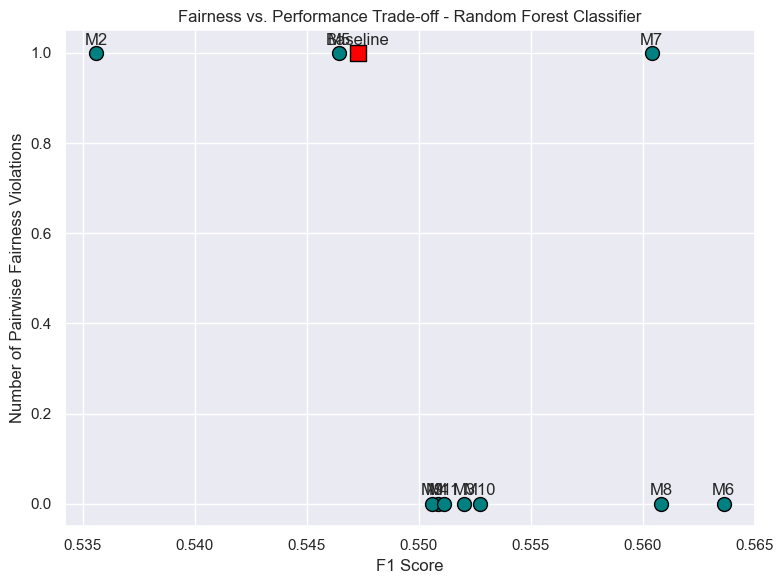

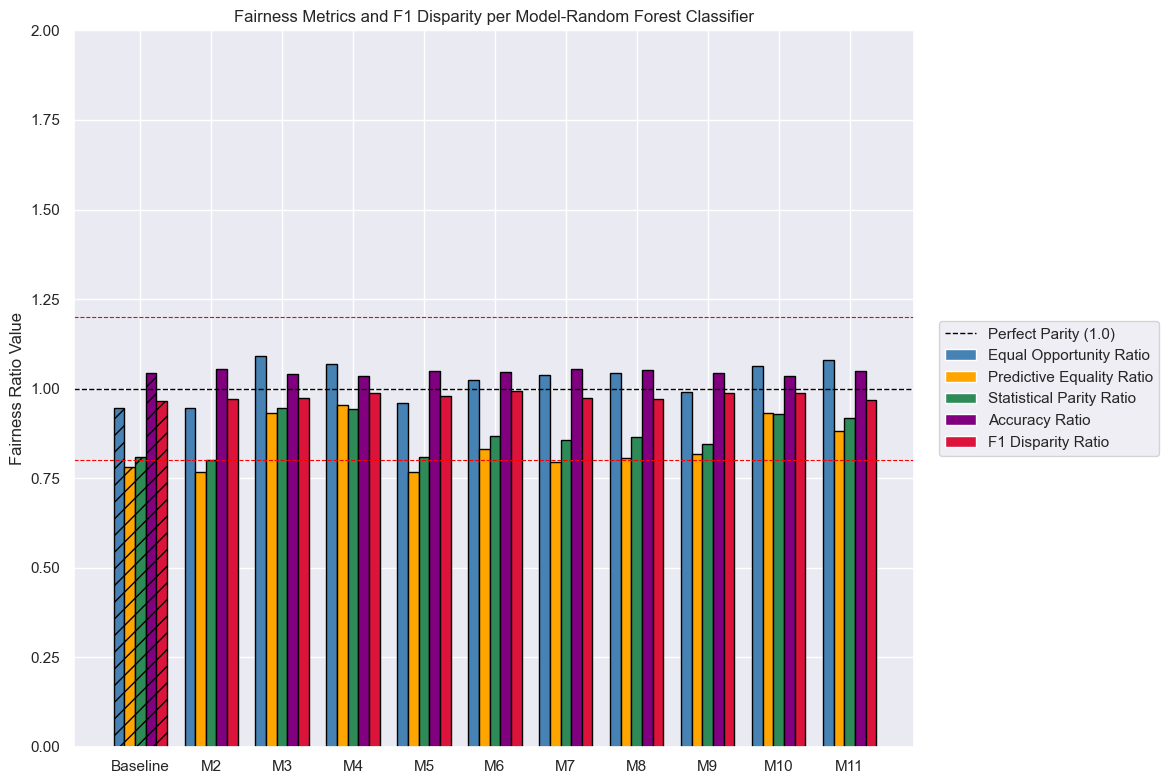

TIME TAKEN 184.56924986839294


In [85]:
rf_results = cut_off(scale = scale,
                        model_name = rf_model,model=model1,hyperparameters=hyperparameters1)

In [86]:
results_path

'C:/Users/user/Desktop/analytics/my_projects/credit_card_default\\1744782419750UNDER_LASSOuser/'

In [87]:
rf_results['summary_df']

,Model,F1,Precision,Recall,Accuracy,ROC AUC,GINI,Specificity,TN,TP,FP,FN,Fairness Violations,F1 Disparity Ratio,Equal Opportunity Ratio,Predictive Equality Ratio,Statistical Parity Ratio,Accuracy Ratio
0,Baseline,0.5473,0.5262,0.5701,0.7910,0.7120,0.4240,0.853903,3916,744,670,561,1,0.9646,0.9456,0.7812,0.8080,1.0433
5,M6,0.5636,0.5320,0.5992,0.7944,0.7246,0.4492,0.849978,3898,782,688,523,0,0.9946,1.0229,0.8313,0.8673,1.0469
7,M8,0.5608,0.5600,0.5617,0.8051,0.7180,0.4361,0.874400,4010,733,576,572,0,0.9717,1.0444,0.8052,0.8646,1.0530
9,M10,0.5527,0.5771,0.5303,0.8099,0.7099,0.4197,0.889446,4079,692,507,613,0,0.9868,1.0632,0.9330,0.9296,1.0364
2,M3,0.5520,0.5357,0.5693,0.7953,0.7145,0.4289,0.859573,3942,743,644,562,0,0.9730,1.0923,0.9318,0.9467,1.0413
10,M11,0.5511,0.5231,0.5824,0.7898,0.7156,0.4313,0.848888,3893,760,693,545,0,0.9695,1.0810,0.8824,0.9186,1.0484
3,M4,0.5508,0.5602,0.5418,0.8043,0.7104,0.4207,0.878980,4031,707,555,598,0,0.9891,1.0696,0.9543,0.9433,1.0346
8,M9,0.5506,0.5278,0.5755,0.7919,0.7145,0.4289,0.853467,3914,751,672,554,0,0.9871,0.9908,0.8161,0.8454,1.0446
6,M7,0.5604,0.5489,0.5724,0.8011,0.7193,0.4385,0.866114,3972,747,614,558,1,0.9725,1.0392,0.7952,0.8571,1.0554
4,M5,0.5464,0.5190,0.5770,0.7878,0.7124,0.4248,0.847798,3888,753,698,552,1,0.9794,0.9598,0.7679,0.8079,1.0505


**2. LIGHTGBM**

In [88]:
model2 = lgb.LGBMClassifier(metric='f1',seed=42)

In [89]:
# 6. Declare hyperparameters to tune
hyperparameters2 = { 'classifier__n_estimators' : list(np.arange(50,1000,50)),
                   'classifier__learning_rate' : np.geomspace(0.01,0.1),
                  'classifier__max_depth': [None,1,2,3,4,5,6,7,8]}

results_path: C:/Users/user/Desktop/analytics/my_projects/credit_card_default\1744782419750UNDER_LASSOuser/


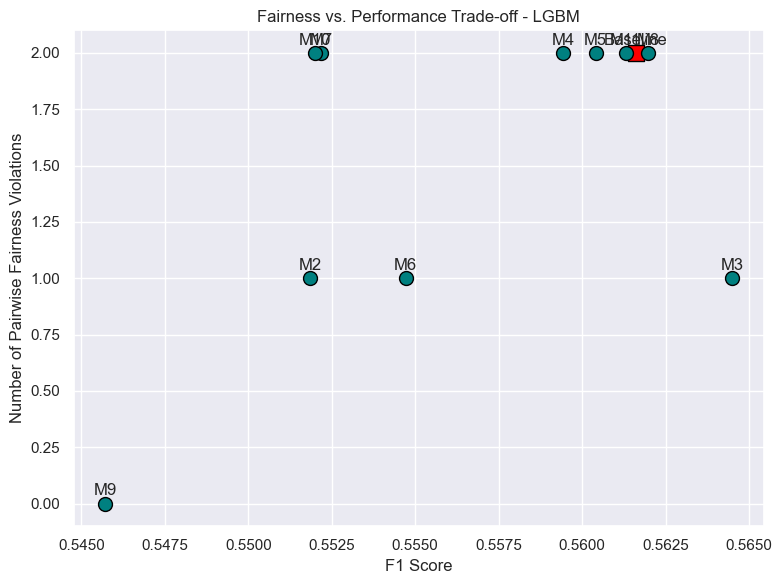

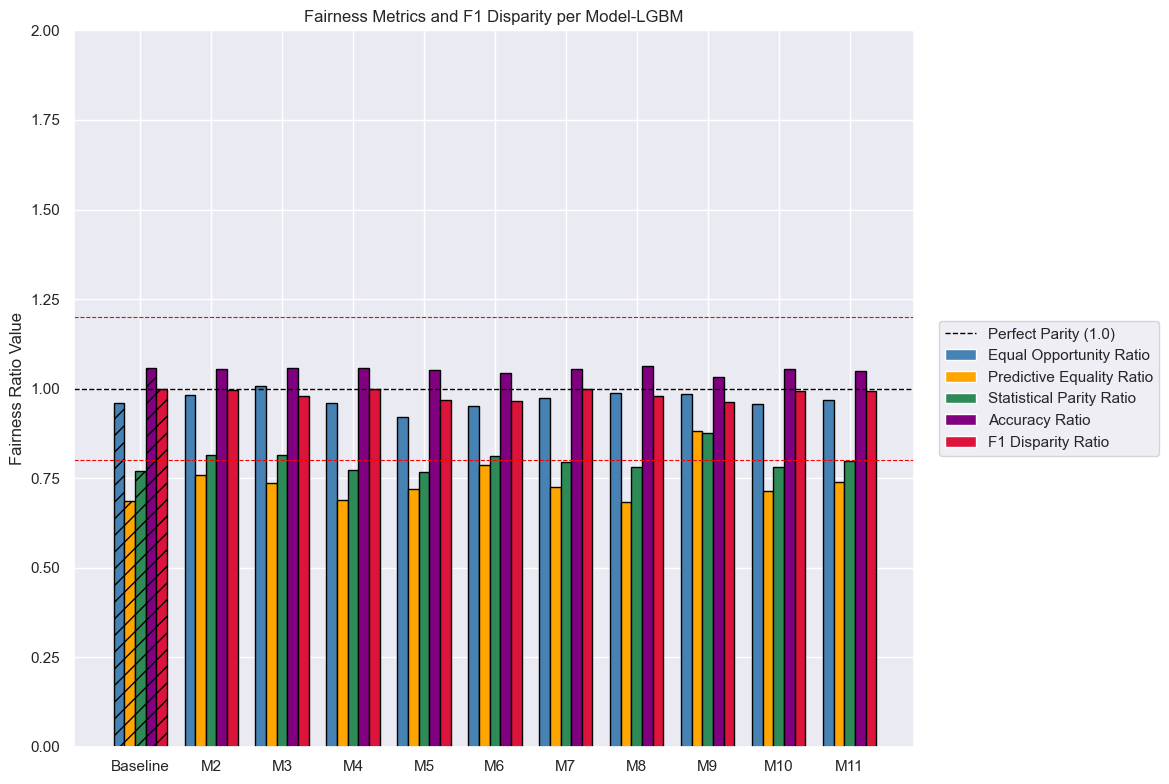

TIME TAKEN 65.94095277786255


In [90]:
#lgb_preds,lgb_predictions,
lgb_results = cut_off(scale = scale,model_name = 'LGBM',model=model2,hyperparameters=hyperparameters2)

In [91]:
lgb_results['summary_df']

,Model,F1,Precision,Recall,Accuracy,ROC AUC,GINI,Specificity,TN,TP,FP,FN,Fairness Violations,F1 Disparity Ratio,Equal Opportunity Ratio,Predictive Equality Ratio,Statistical Parity Ratio,Accuracy Ratio
0,Baseline,0.5616,0.5795,0.5448,0.8116,0.7162,0.4323,0.887484,4070,711,516,594,2,0.9979,0.9605,0.6862,0.7700,1.0577
8,M9,0.5457,0.5026,0.5969,0.7798,0.7144,0.4288,0.831880,3815,779,771,526,0,0.9613,0.9836,0.8829,0.8758,1.0311
2,M3,0.5645,0.5762,0.5533,0.8109,0.7187,0.4375,0.884213,4055,722,531,583,1,0.9796,1.0063,0.7372,0.8153,1.0567
5,M6,0.5547,0.5246,0.5885,0.7907,0.7184,0.4367,0.848234,3890,768,696,537,1,0.9664,0.9503,0.7872,0.8131,1.0428
1,M2,0.5519,0.5341,0.5709,0.7946,0.7146,0.4291,0.858264,3936,745,650,560,1,0.9972,0.9811,0.7601,0.8135,1.0541
7,M8,0.5620,0.5855,0.5402,0.8134,0.7157,0.4314,0.891191,4087,705,499,600,2,0.9783,0.9866,0.6821,0.7802,1.0623
10,M11,0.5613,0.5704,0.5525,0.8087,0.7170,0.4341,0.881596,4043,721,543,584,2,0.9923,0.9682,0.7400,0.7988,1.0499
4,M5,0.5604,0.5336,0.5900,0.7949,0.7216,0.4433,0.853249,3913,770,673,535,2,0.9670,0.9220,0.7203,0.7674,1.0511
3,M4,0.5594,0.5792,0.5410,0.8112,0.7146,0.4291,0.888138,4073,706,513,599,2,0.9987,0.9610,0.6894,0.7717,1.0572
6,M7,0.5522,0.5614,0.5433,0.8048,0.7112,0.4225,0.879198,4032,709,554,596,2,0.9977,0.9750,0.7243,0.7939,1.0559


**3. XGBOOST**

In [92]:
model3 = XGBClassifier(random_state=42)

In [93]:
# 6. Declare hyperparameters to tune
hyperparameters3 = { 'classifier__n_estimators' : list(np.arange(50,1000,50)),
                   'classifier__learning_rate' : np.geomspace(0.01,0.1),
                  'classifier__max_depth': [None,1,2,3,4,5,6,7,8]}
                   #'classifier__early_stopping_rounds' :[10,50,100,150]}

results_path: C:/Users/user/Desktop/analytics/my_projects/credit_card_default\1744782419750UNDER_LASSOuser/


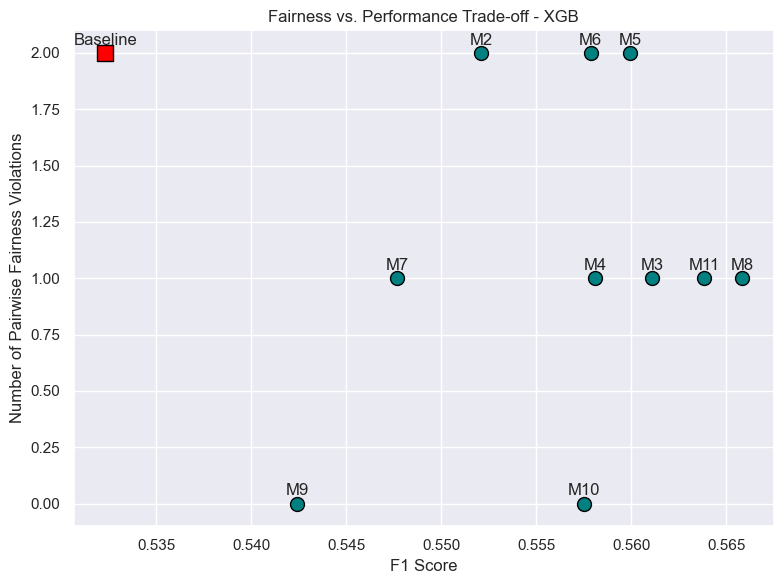

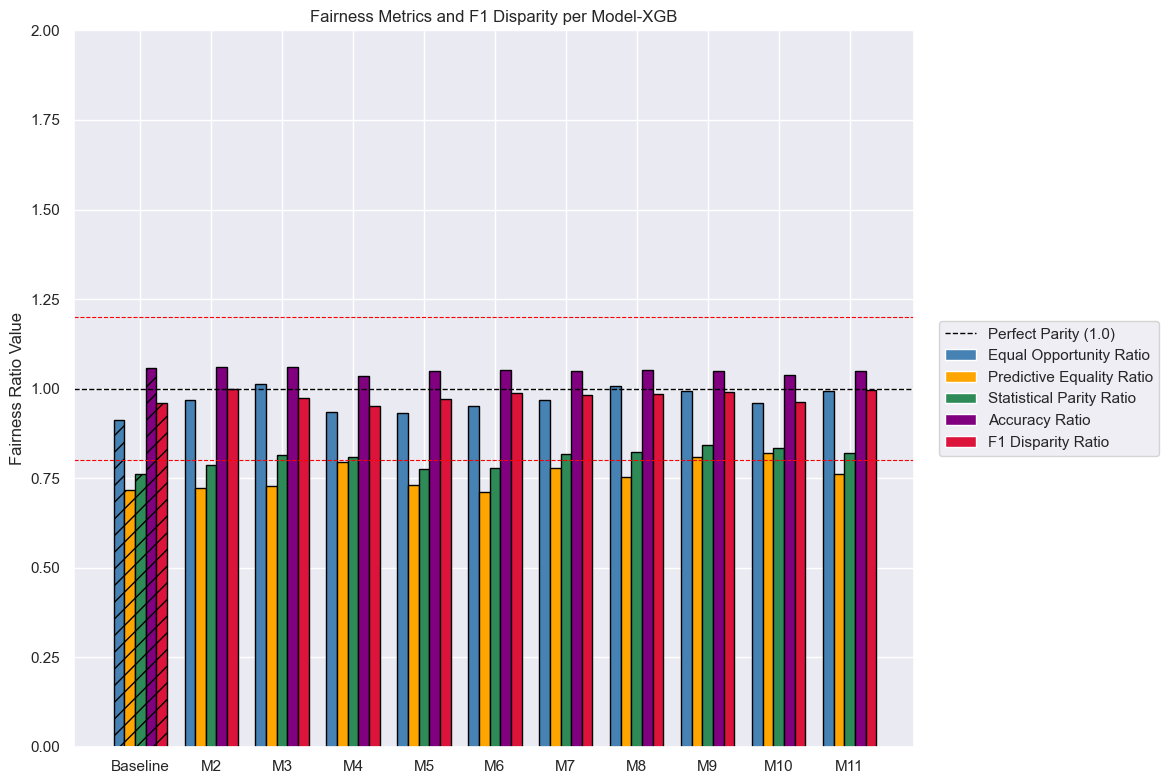

TIME TAKEN 92.11868715286255


In [94]:
#xgb_preds,xgb_predictions,
xgb_results = cut_off(scale = scale,model_name = 'XGB',
                                                             model=model3,hyperparameters=hyperparameters3)

In [95]:
xgb_results['summary_df']

,Model,F1,Precision,Recall,Accuracy,ROC AUC,GINI,Specificity,TN,TP,FP,FN,Fairness Violations,F1 Disparity Ratio,Equal Opportunity Ratio,Predictive Equality Ratio,Statistical Parity Ratio,Accuracy Ratio
0,Baseline,0.5323,0.5059,0.5617,0.7814,0.7028,0.4056,0.843873,3870,733,716,572,2,0.9611,0.9124,0.7171,0.7613,1.0563
9,M10,0.5575,0.5195,0.6015,0.7885,0.7216,0.4432,0.841692,3860,785,726,520,0,0.9633,0.9600,0.8210,0.8341,1.0376
8,M9,0.5424,0.5185,0.5686,0.7875,0.7092,0.4183,0.849760,3897,742,689,563,0,0.9915,0.9939,0.8083,0.8432,1.0482
7,M8,0.5658,0.5790,0.5533,0.8119,0.7194,0.4388,0.885521,4061,722,525,583,1,0.9845,1.0063,0.7540,0.8235,1.0531
10,M11,0.5638,0.5765,0.5517,0.8109,0.7182,0.4364,0.884649,4057,720,529,585,1,0.9954,0.9936,0.7611,0.8207,1.0498
2,M3,0.5611,0.5758,0.5471,0.8104,0.7162,0.4324,0.885303,4060,714,526,591,1,0.9735,1.0115,0.7286,0.8135,1.0594
3,M4,0.5581,0.5445,0.5724,0.7992,0.7181,0.4361,0.863716,3961,747,625,558,1,0.9523,0.9340,0.7952,0.8084,1.0353
6,M7,0.5477,0.5181,0.5808,0.7875,0.7136,0.4271,0.846271,3881,758,705,547,1,0.9822,0.9676,0.7773,0.8161,1.0500
4,M5,0.5599,0.5353,0.5870,0.7956,0.7210,0.4420,0.854993,3921,766,665,539,2,0.9706,0.9314,0.7301,0.7765,1.0505
5,M6,0.5578,0.5674,0.5487,0.8073,0.7148,0.4296,0.880942,4040,716,546,589,2,0.9884,0.9513,0.7113,0.7772,1.0529


**4. DECISION TREES**

In [96]:
model4 = DecisionTreeClassifier(random_state=42)

In [97]:
hyperparameters4 = {'classifier__max_depth': [None,1,2,3,4,5,6,7,8]}

results_path: C:/Users/user/Desktop/analytics/my_projects/credit_card_default\1744782419750UNDER_LASSOuser/


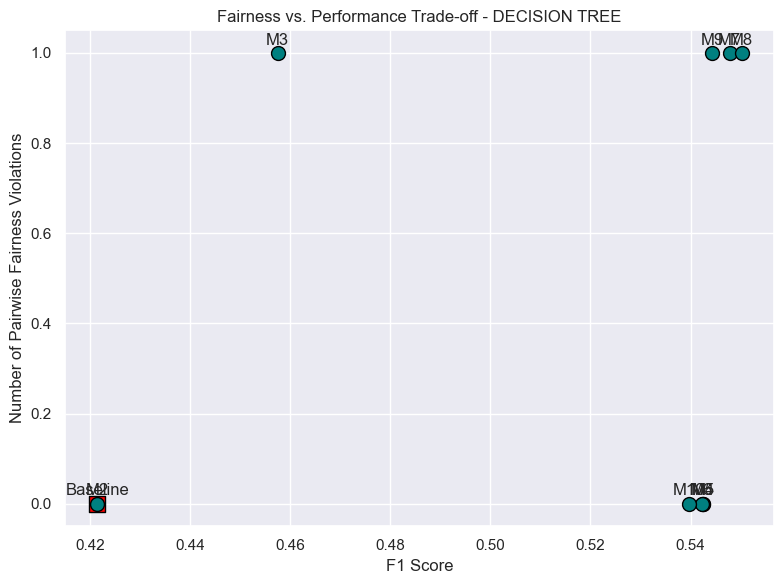

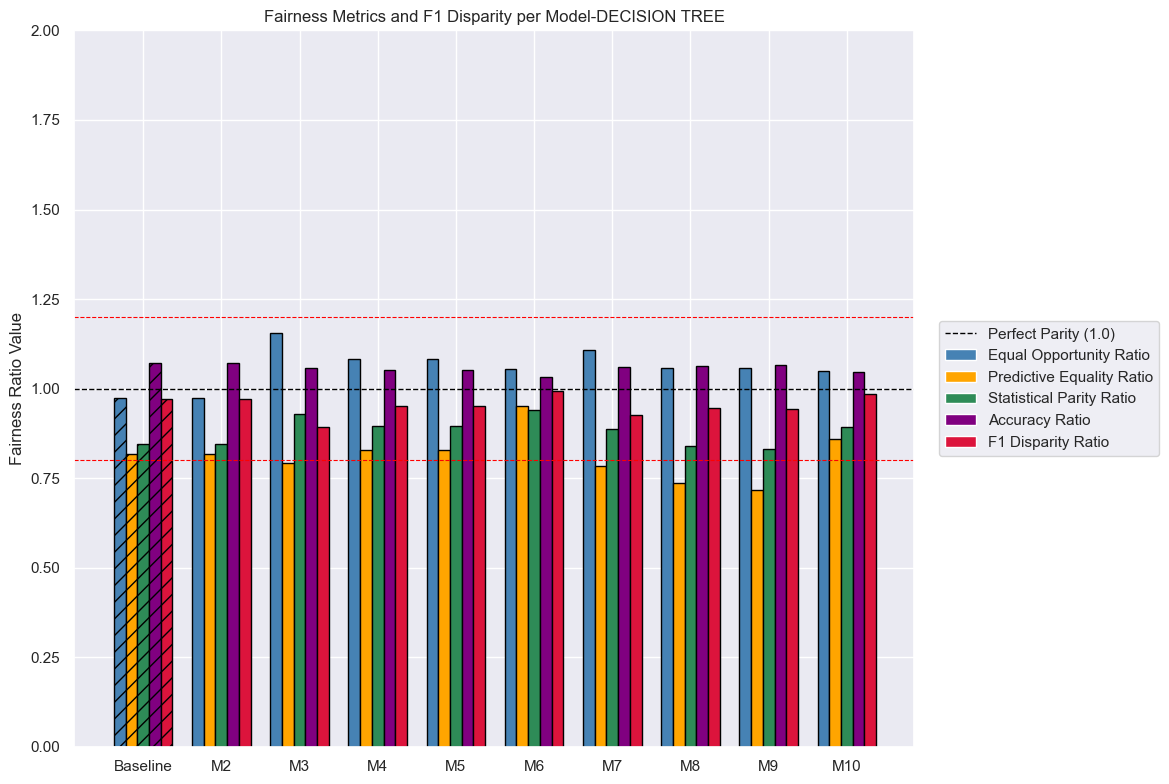

TIME TAKEN 18.390299558639526


In [98]:
dt_results = cut_off(scale = scale,model_name = 'DECISION TREE',
                                                             model=model4,hyperparameters=hyperparameters4)

In [99]:
dt_results['summary_df']

,Model,F1,Precision,Recall,Accuracy,ROC AUC,GINI,Specificity,TN,TP,FP,FN,Fairness Violations,F1 Disparity Ratio,Equal Opportunity Ratio,Predictive Equality Ratio,Statistical Parity Ratio,Accuracy Ratio
0,Baseline,0.4215,0.3700,0.4897,0.7023,0.6262,0.2524,0.762756,3498,639,1088,666,0,0.9705,0.9747,0.8175,0.8458,1.0701
3,M4,0.5425,0.6024,0.4935,0.8157,0.7004,0.4008,0.907327,4161,644,425,661,0,0.9501,1.0828,0.8279,0.8946,1.0519
4,M5,0.5425,0.6024,0.4935,0.8157,0.7004,0.4008,0.907327,4161,644,425,661,0,0.9501,1.0828,0.8279,0.8946,1.0519
5,M6,0.5422,0.5033,0.5877,0.7802,0.7113,0.4227,0.834932,3829,767,757,538,0,0.9921,1.0537,0.9511,0.9406,1.0316
9,M10,0.5396,0.5180,0.5632,0.7871,0.7070,0.4141,0.850850,3902,735,684,570,0,0.9852,1.0478,0.8597,0.8927,1.0477
1,M2,0.4215,0.3700,0.4897,0.7023,0.6262,0.2524,0.762756,3498,639,1088,666,0,0.9705,0.9747,0.8175,0.8458,1.0701
7,M8,0.5502,0.5917,0.5142,0.8138,0.7066,0.4132,0.899041,4123,671,463,634,1,0.9463,1.0562,0.7353,0.8384,1.0628
6,M7,0.5478,0.6018,0.5027,0.8162,0.7040,0.4080,0.905364,4152,656,434,649,1,0.9259,1.1072,0.7850,0.8868,1.0613
8,M9,0.5443,0.5956,0.5011,0.8141,0.7022,0.4043,0.903184,4142,654,444,651,1,0.9418,1.0566,0.7177,0.8305,1.0651
2,M3,0.4575,0.7150,0.3364,0.8233,0.6491,0.2982,0.961840,4411,439,175,866,1,0.8928,1.1561,0.7928,0.9288,1.0567


**5. CATBOOST**

In [100]:
from catboost import CatBoostClassifier

In [101]:
model5 = CatBoostClassifier(random_state = 42,verbose=False,eval_metric='F1',allow_writing_files=False)

In [102]:
hyperparameters5 = { 'classifier__n_estimators' : list(np.arange(50,1000,50)),
                   'classifier__learning_rate' : np.geomspace(0.01,0.5),
                  'classifier__max_depth': [None,1,2,3,4,5,6,7,8],
                   'classifier__subsample' : list(np.arange(0.1,0.9,0.1))
                                                  }

results_path: C:/Users/user/Desktop/analytics/my_projects/credit_card_default\1744782419750UNDER_LASSOuser/


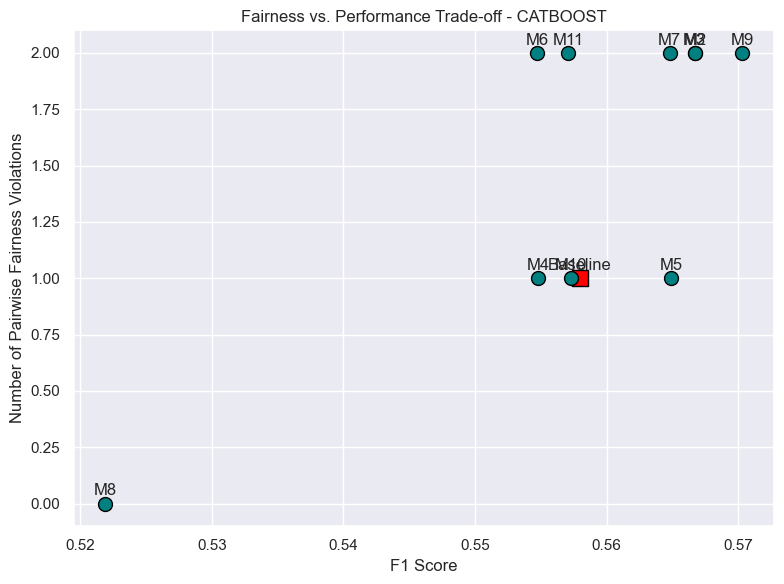

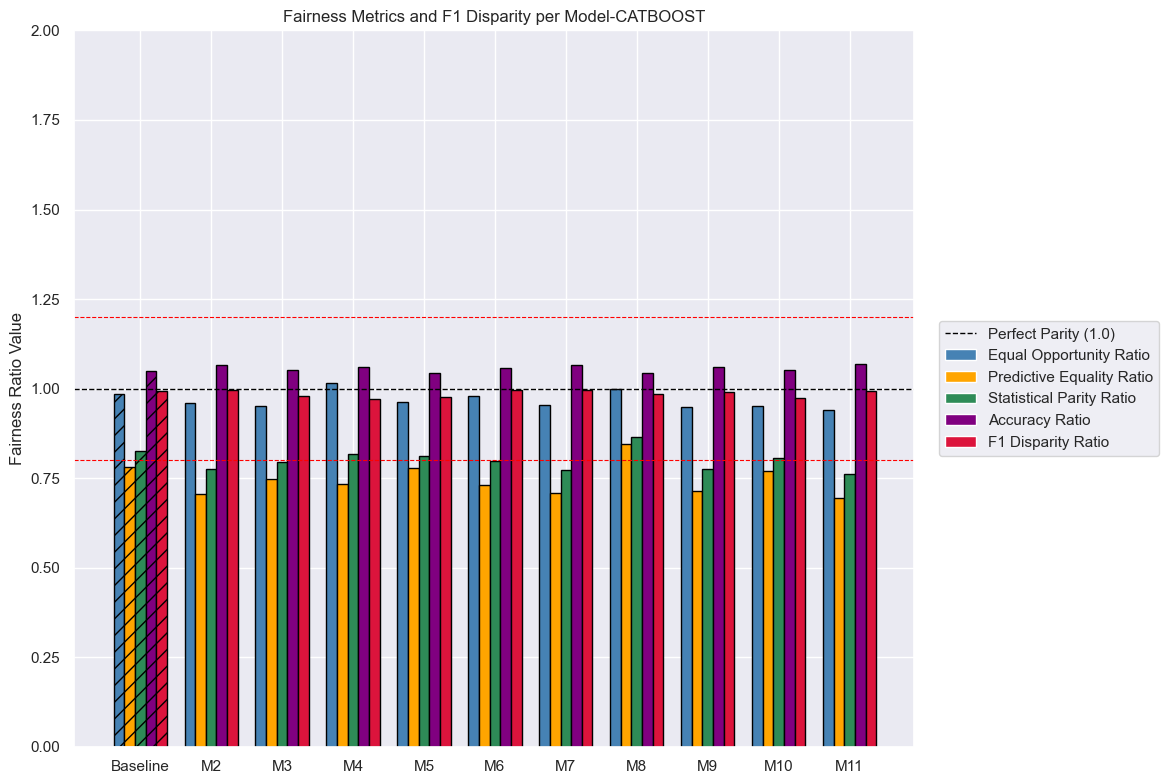

TIME TAKEN 222.71552300453186


In [103]:
ct_results = cut_off(scale = scale,model_name = 'CATBOOST',
                                                             model=model5,hyperparameters=hyperparameters5)

In [104]:
ct_results['summary_df']

,Model,F1,Precision,Recall,Accuracy,ROC AUC,GINI,Specificity,TN,TP,FP,FN,Fairness Violations,F1 Disparity Ratio,Equal Opportunity Ratio,Predictive Equality Ratio,Statistical Parity Ratio,Accuracy Ratio
0,Baseline,0.5580,0.5368,0.5808,0.7961,0.7191,0.4382,0.857392,3932,758,654,547,1,0.9931,0.9846,0.7815,0.8256,1.0495
7,M8,0.5219,0.5189,0.5249,0.7870,0.6932,0.3864,0.861535,3951,685,635,620,0,0.9847,0.9993,0.8467,0.8644,1.0422
4,M5,0.5649,0.5419,0.5900,0.7987,0.7240,0.4481,0.858046,3935,770,651,535,1,0.9777,0.9614,0.7771,0.8129,1.0448
9,M10,0.5573,0.4997,0.6299,0.7783,0.7252,0.4504,0.820541,3763,822,823,483,1,0.9740,0.9523,0.7707,0.8063,1.0515
3,M4,0.5548,0.5611,0.5487,0.8050,0.7133,0.4265,0.877889,4026,716,560,589,1,0.9718,1.0150,0.7340,0.8165,1.0615
8,M9,0.5703,0.5314,0.6153,0.7946,0.7305,0.4609,0.845617,3878,803,708,502,2,0.9895,0.9476,0.7134,0.7750,1.0594
1,M2,0.5667,0.5230,0.6184,0.7905,0.7290,0.4579,0.839512,3850,807,736,498,2,0.9964,0.9612,0.7048,0.7757,1.0673
2,M3,0.5667,0.5241,0.6169,0.7910,0.7287,0.4575,0.840602,3855,805,731,500,2,0.9796,0.9505,0.7489,0.7943,1.0521
6,M7,0.5648,0.5225,0.6146,0.7902,0.7274,0.4547,0.840166,3853,802,733,503,2,0.9971,0.9539,0.7072,0.7739,1.0650
10,M11,0.5571,0.5115,0.6115,0.7846,0.7227,0.4453,0.833842,3824,798,762,507,2,0.9926,0.9403,0.6947,0.7610,1.0687


**6. DEEP LEARNING MODEL**

In [105]:
model_name="NEURAL_MODEL"

In [106]:
tf.random.set_seed(42)

In [107]:
def build_model(num_features,optimizer='adam'):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),  # Dynamic input shape
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [108]:
#parameter tuning
hyperparameters6 = {
    'classifier__batch_size': [16, 32, 64],  # No `model__` prefix needed
    'classifier__epochs': [10, 20, 30]  # No `model__` prefix needed
}

results_path: C:/Users/user/Desktop/analytics/my_projects/credit_card_default\1744782419750UNDER_LASSOuser/


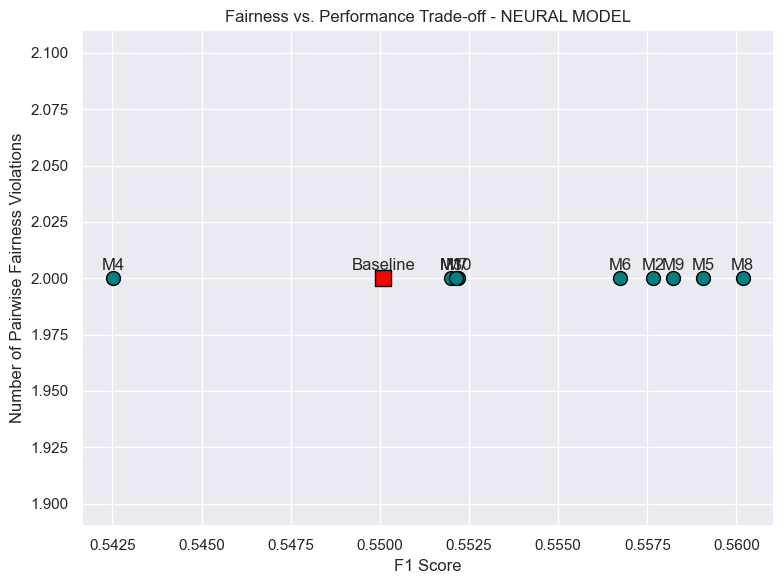

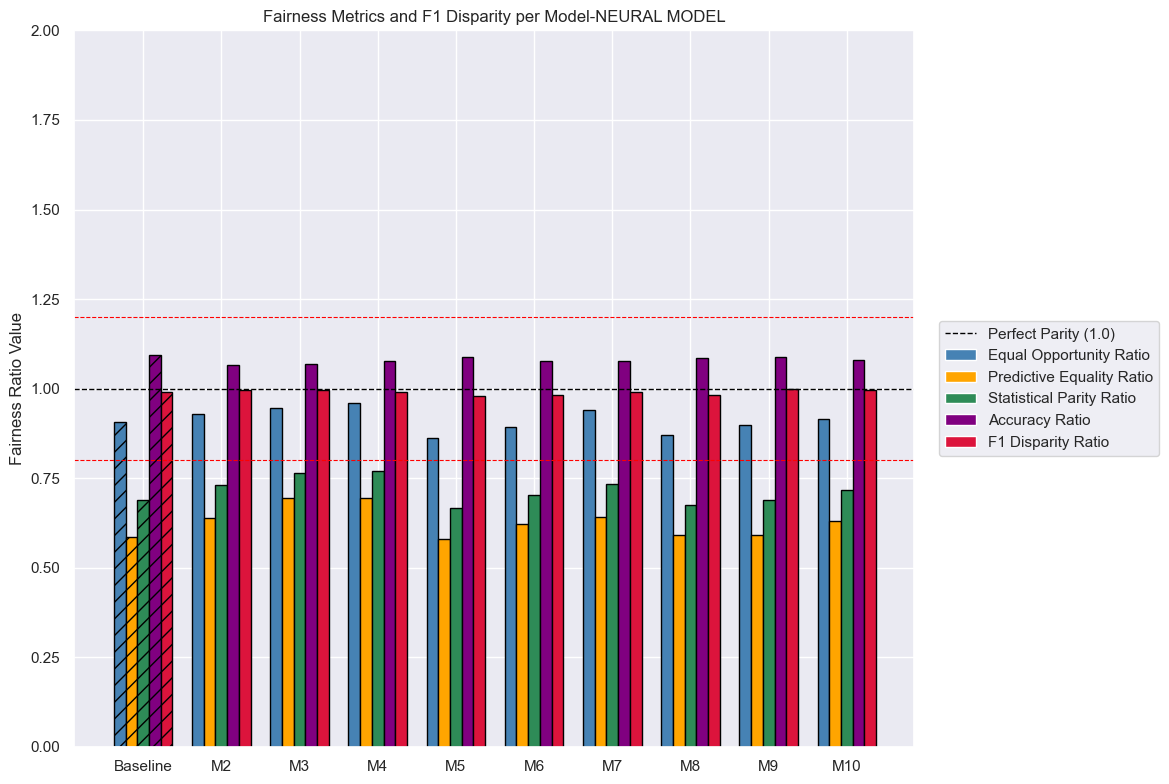

TIME TAKEN 772.5934584140778


In [109]:
nn_results = cut_off(scale = scale,model_name = 'NEURAL MODEL',
                                                             model=None,hyperparameters=hyperparameters6)

In [110]:
nn_results['summary_df']

,Model,F1,Precision,Recall,Accuracy,ROC AUC,GINI,Specificity,TN,TP,FP,FN,Fairness Violations,F1 Disparity Ratio,Equal Opportunity Ratio,Predictive Equality Ratio,Statistical Parity Ratio,Accuracy Ratio
0,Baseline,0.5501,0.5243,0.5785,0.7904,0.7146,0.4292,0.850632,3901,755,685,550,2,0.9903,0.9072,0.5869,0.6881,1.0928
7,M8,0.5602,0.5218,0.6046,0.7897,0.7235,0.4469,0.842346,3863,789,723,516,2,0.9808,0.8701,0.5906,0.6758,1.0843
4,M5,0.5591,0.5205,0.6038,0.7890,0.7228,0.4455,0.841692,3860,788,726,517,2,0.9794,0.8619,0.5802,0.6666,1.0869
8,M9,0.5582,0.5242,0.5969,0.7907,0.7214,0.4428,0.845835,3879,779,707,526,2,0.9985,0.8980,0.5921,0.6877,1.0896
1,M2,0.5577,0.5613,0.5540,0.8053,0.7154,0.4308,0.876799,4021,723,565,582,2,0.9973,0.9289,0.6375,0.7297,1.0673
5,M6,0.5567,0.5210,0.5977,0.7892,0.7207,0.4414,0.843655,3869,780,717,525,2,0.9835,0.8922,0.6226,0.7025,1.0779
6,M7,0.5522,0.5340,0.5716,0.7946,0.7148,0.4297,0.858046,3935,746,651,559,2,0.9904,0.9406,0.6417,0.7337,1.0774
9,M10,0.5521,0.5249,0.5824,0.7907,0.7162,0.4324,0.849978,3898,760,688,545,2,0.9960,0.9147,0.6309,0.7164,1.0785
2,M3,0.5520,0.5156,0.5939,0.7865,0.7176,0.4351,0.841256,3858,775,728,530,2,0.9948,0.9450,0.6952,0.7634,1.0681
3,M4,0.5425,0.4994,0.5939,0.7781,0.7122,0.4244,0.830571,3809,775,777,530,2,0.9914,0.9610,0.6950,0.7686,1.0767


In [111]:
end_script = time.time()

In [112]:
print("TIME TAKEN TO RUN THE WHOLE SCRIPT",end_script-start_script , "SECONDS")

TIME TAKEN TO RUN THE WHOLE SCRIPT 1382.9310746192932 SECONDS
